## <font color = "a800ff"> <u>**Header**</u> </font>

#### <font color = "red"> **Imports** </font>

In [ ]:

#? ---------------------- linear algebra and dataset manager ----------------------
import numpy  as np  # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#? ----------------------------- scikit-learn models ------------------------------
from sklearn.linear_model   import LinearRegression       as LinearRegressionMP_SKL
from sklearn.linear_model   import SGDRegressor           as LinearRegressionSGD_SKL
from sklearn.linear_model   import LogisticRegression     as LogisticRegression_SKL
from sklearn.neighbors      import KNeighborsClassifier   as KNearestNeighbor_SKL
from sklearn.tree           import DecisionTreeClassifier as DecisionTree_SKL
from sklearn.neural_network import MLPClassifier          as NeuralNetworkClassification_SKL
from sklearn.neural_network import MLPRegressor           as NeuralNetworkRegression_SKL


#? ----------------------------------- metrics ------------------------------------
from sklearn.metrics        import mean_squared_error     as  mse
from sklearn.metrics        import mean_absolute_error    as  mae
from sklearn.metrics        import accuracy_score         as  acc

#? -------------------------------- other libraries -------------------------------
from itertools import product
from time      import time

#? ---------------------------------- plotting ------------------------------------
import matplotlib.pyplot as plt
import seaborn           as sns
%matplotlib inline

#### <font color = "red"> **Flags definition** </font>

Theese are only the signatures of the flags, <u>**see</u> `test section` <u>to tweak them**</u>

In [ ]:
#? -------------- model flags --------------
ALL_MODELS, LINEAR_REGRESSION, SGD_REGRESSOR, LOGISTIC_REGRESSION, DECISION_TREE,   K_NEAREST_NEIGHBOR, NEURAL_NETWORK = True, True, True, True, True, True, True
#? ------------- general flags --------------
VERBOSE, GRID_SEARCH, PLOT =  True, True, True

In [ ]:
#? ------ for plotting ------
metrics = {}

#### <font color = "red"> **Dataset download** </font>

In [ ]:
url='https://drive.google.com/file/d/12dUeEO_rkButPD79pOteFoSSeuIBg5qt/view?usp=drive_link'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
dataset = pd.read_csv(dwn_url)

## <font color = "a800ff"> <u>**Data wrangling**</u> </font>

### <font color = "red"> <u> **About The Dataset** </u> </font>

The data consist of the estimation of obesity levels in people from the countries of Mexico, Peru and Colombia, with ages between 14 and 61 and diverse eating habits and physical condition , data was collected using a web platform with a survey where anonymous users answered each question, then the information was processed obtaining 17 attributes and 2111 records.

The **attributes** related with **eating habits** are:
- Frequent consumption of high caloric food (**FAVC**),
- Frequency of consumption of vegetables (**FCVC**),
- Number of main meals (**NCP**),
- Consumption of food between meals (**CAEC**),
- Consumption of water daily (**CH20**),
- Consumption of alcohol (**CALC**).

The **attributes** related with the **physical condition** are:
- Calories consumption monitoring (**SCC**),
- Physical activity frequency (**FAF**),
- Time using technology devices (**TUE**),
- Transportation used (**MTRANS**)

variables obtained :
**Gender**, **Age**, **Height** and **Weight**.

**NObesity** values are:

* Underweight
* Normal
* Overweight
* Obesity I
* Obesity II
* Obesity III

In [ ]:
dataset.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


#### <font color = "red"> <u> **Plots** </u> </font>

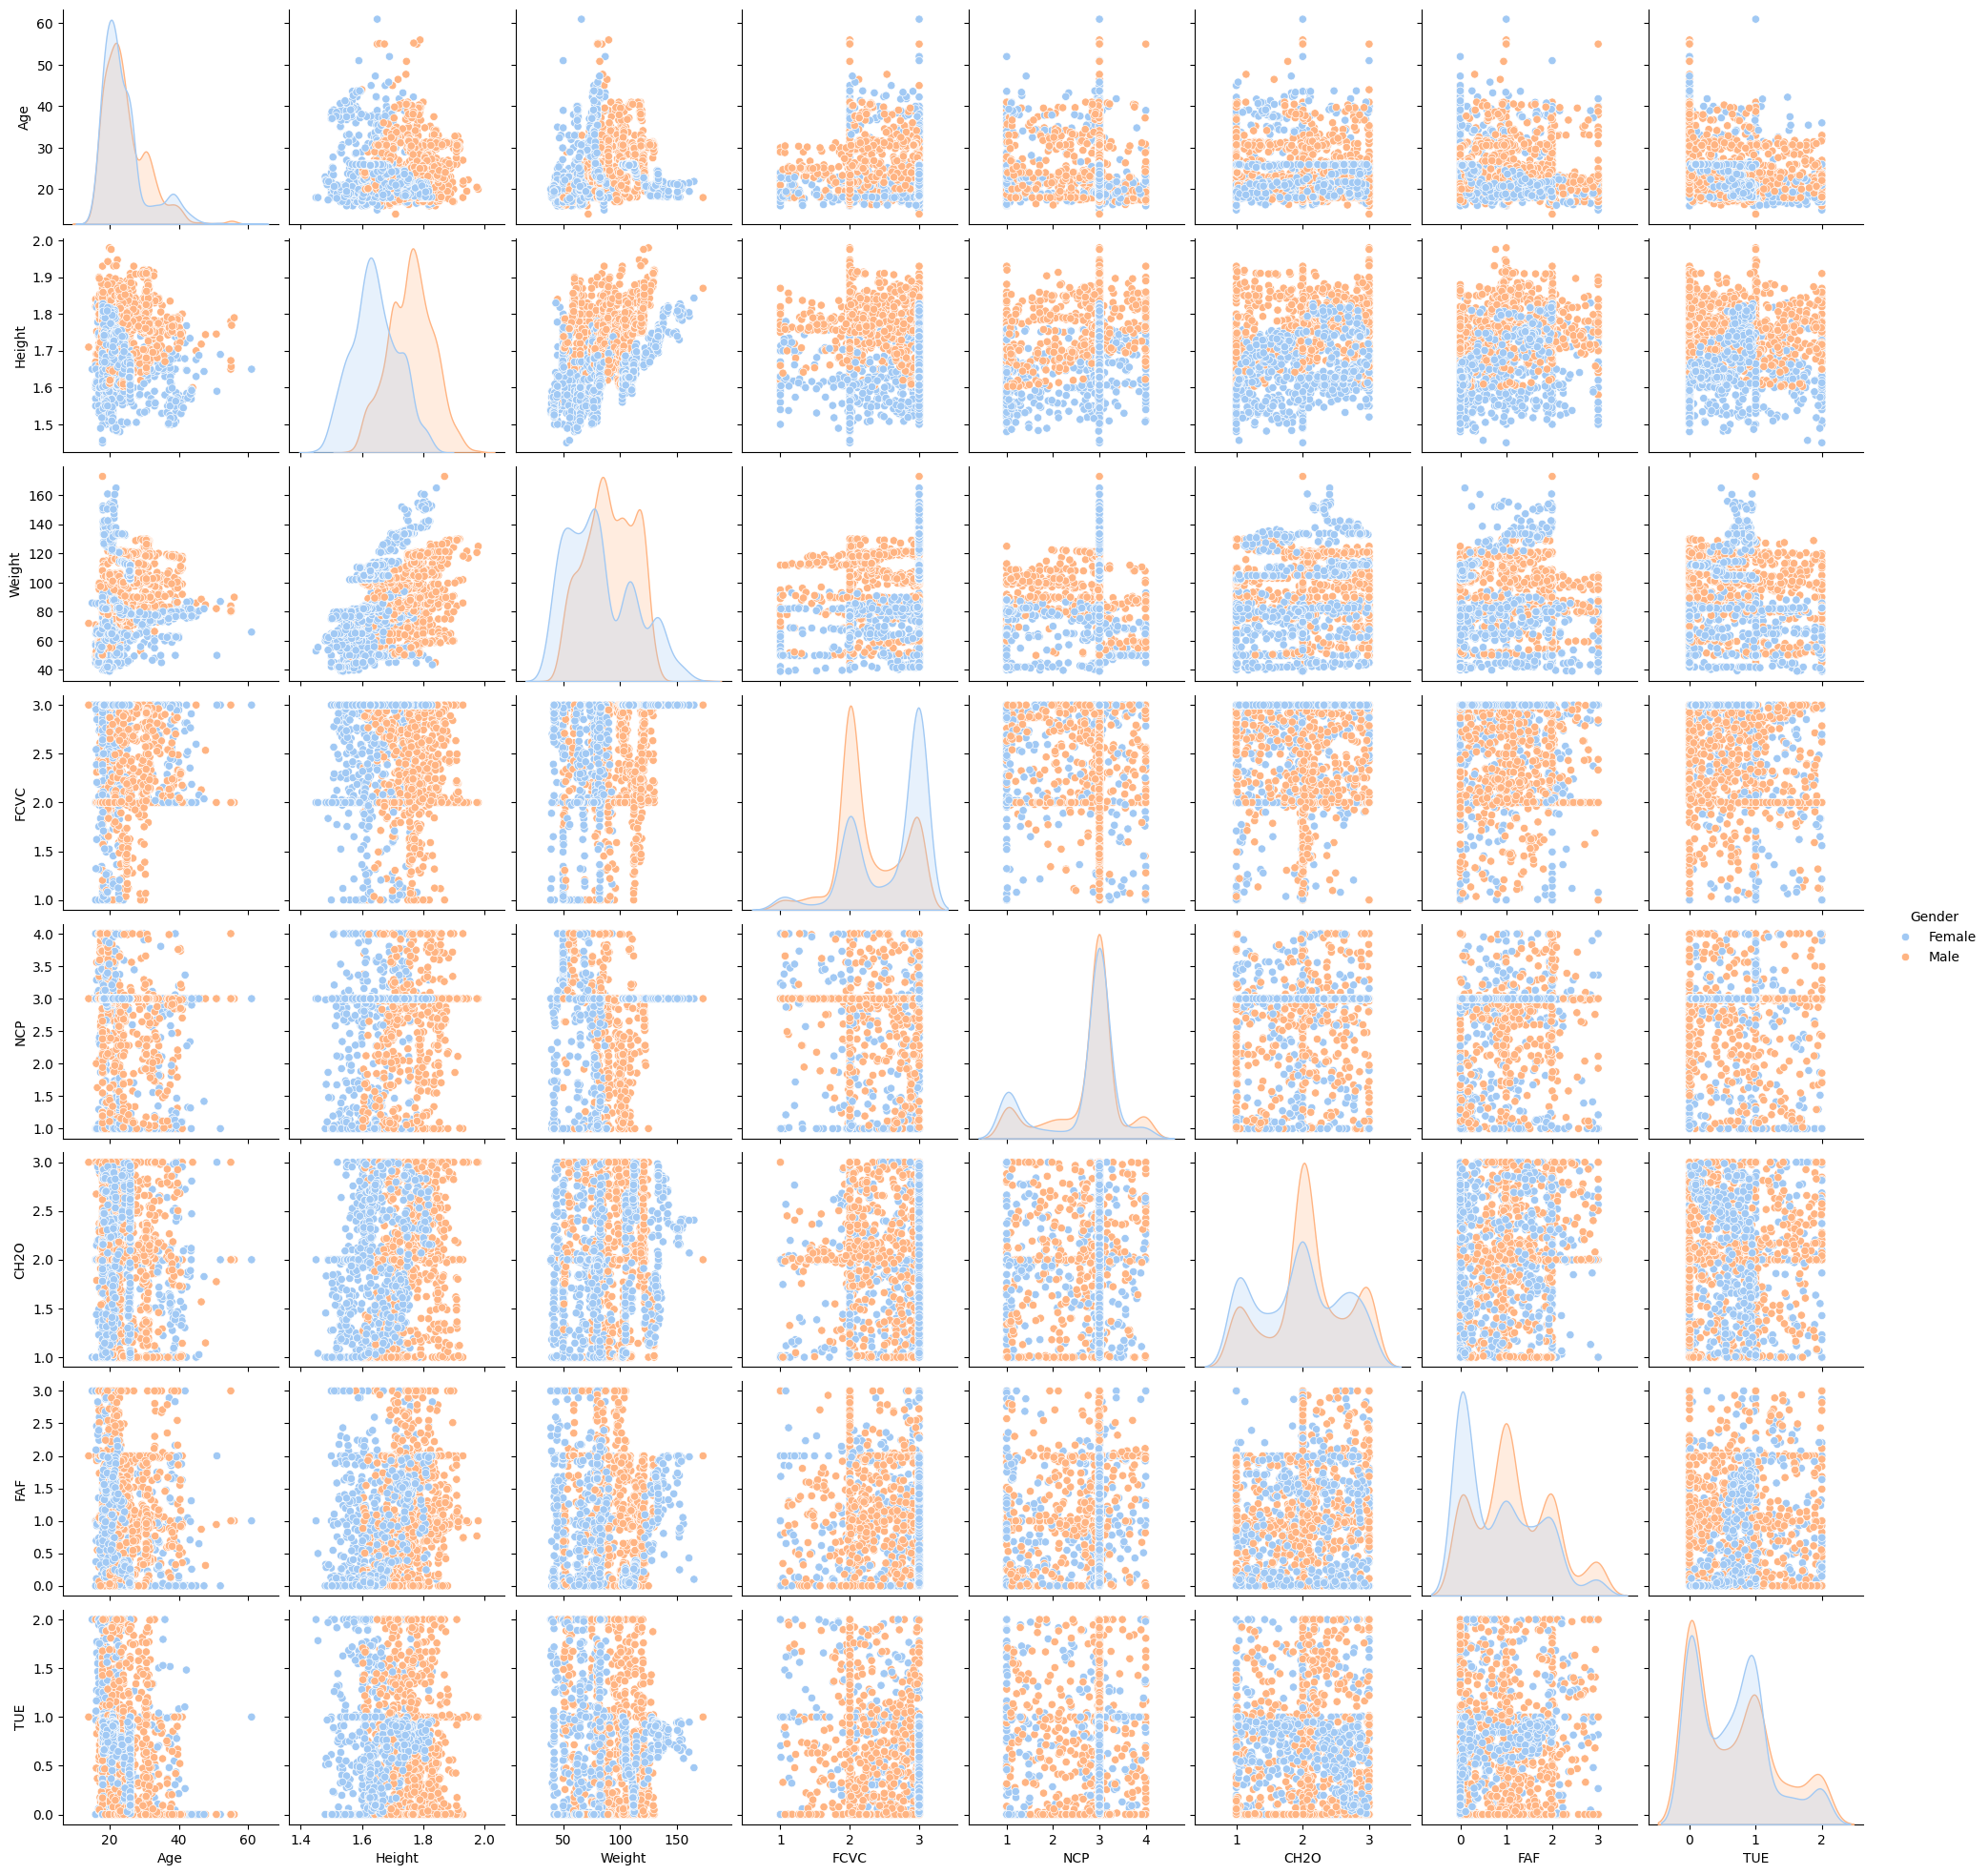

In [ ]:
g = sns.pairplot(dataset, hue="Gender", palette="pastel", diag_kind="kde") if PLOT else None

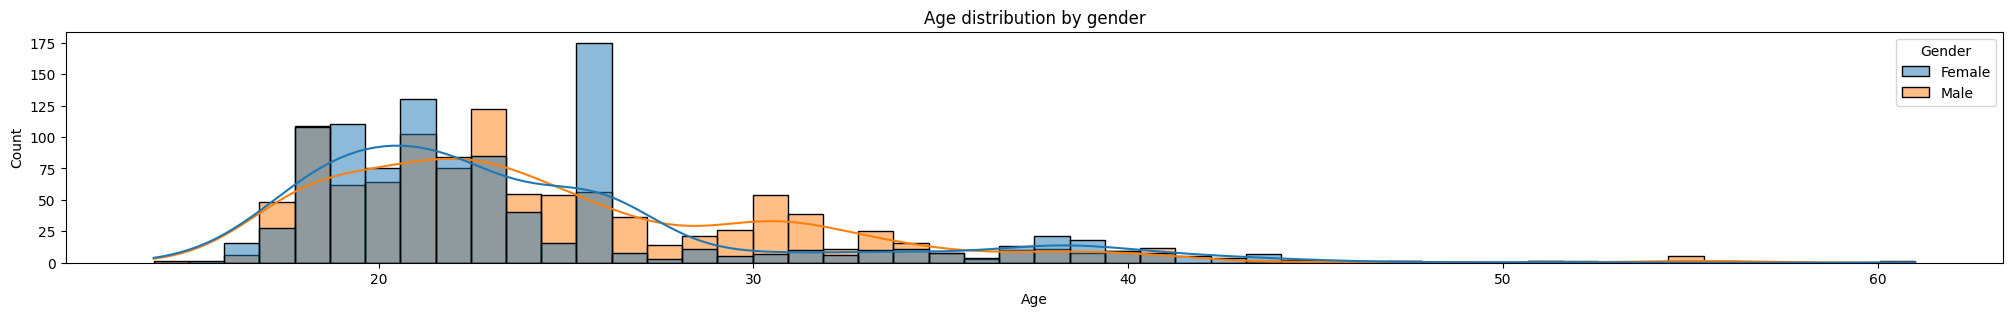

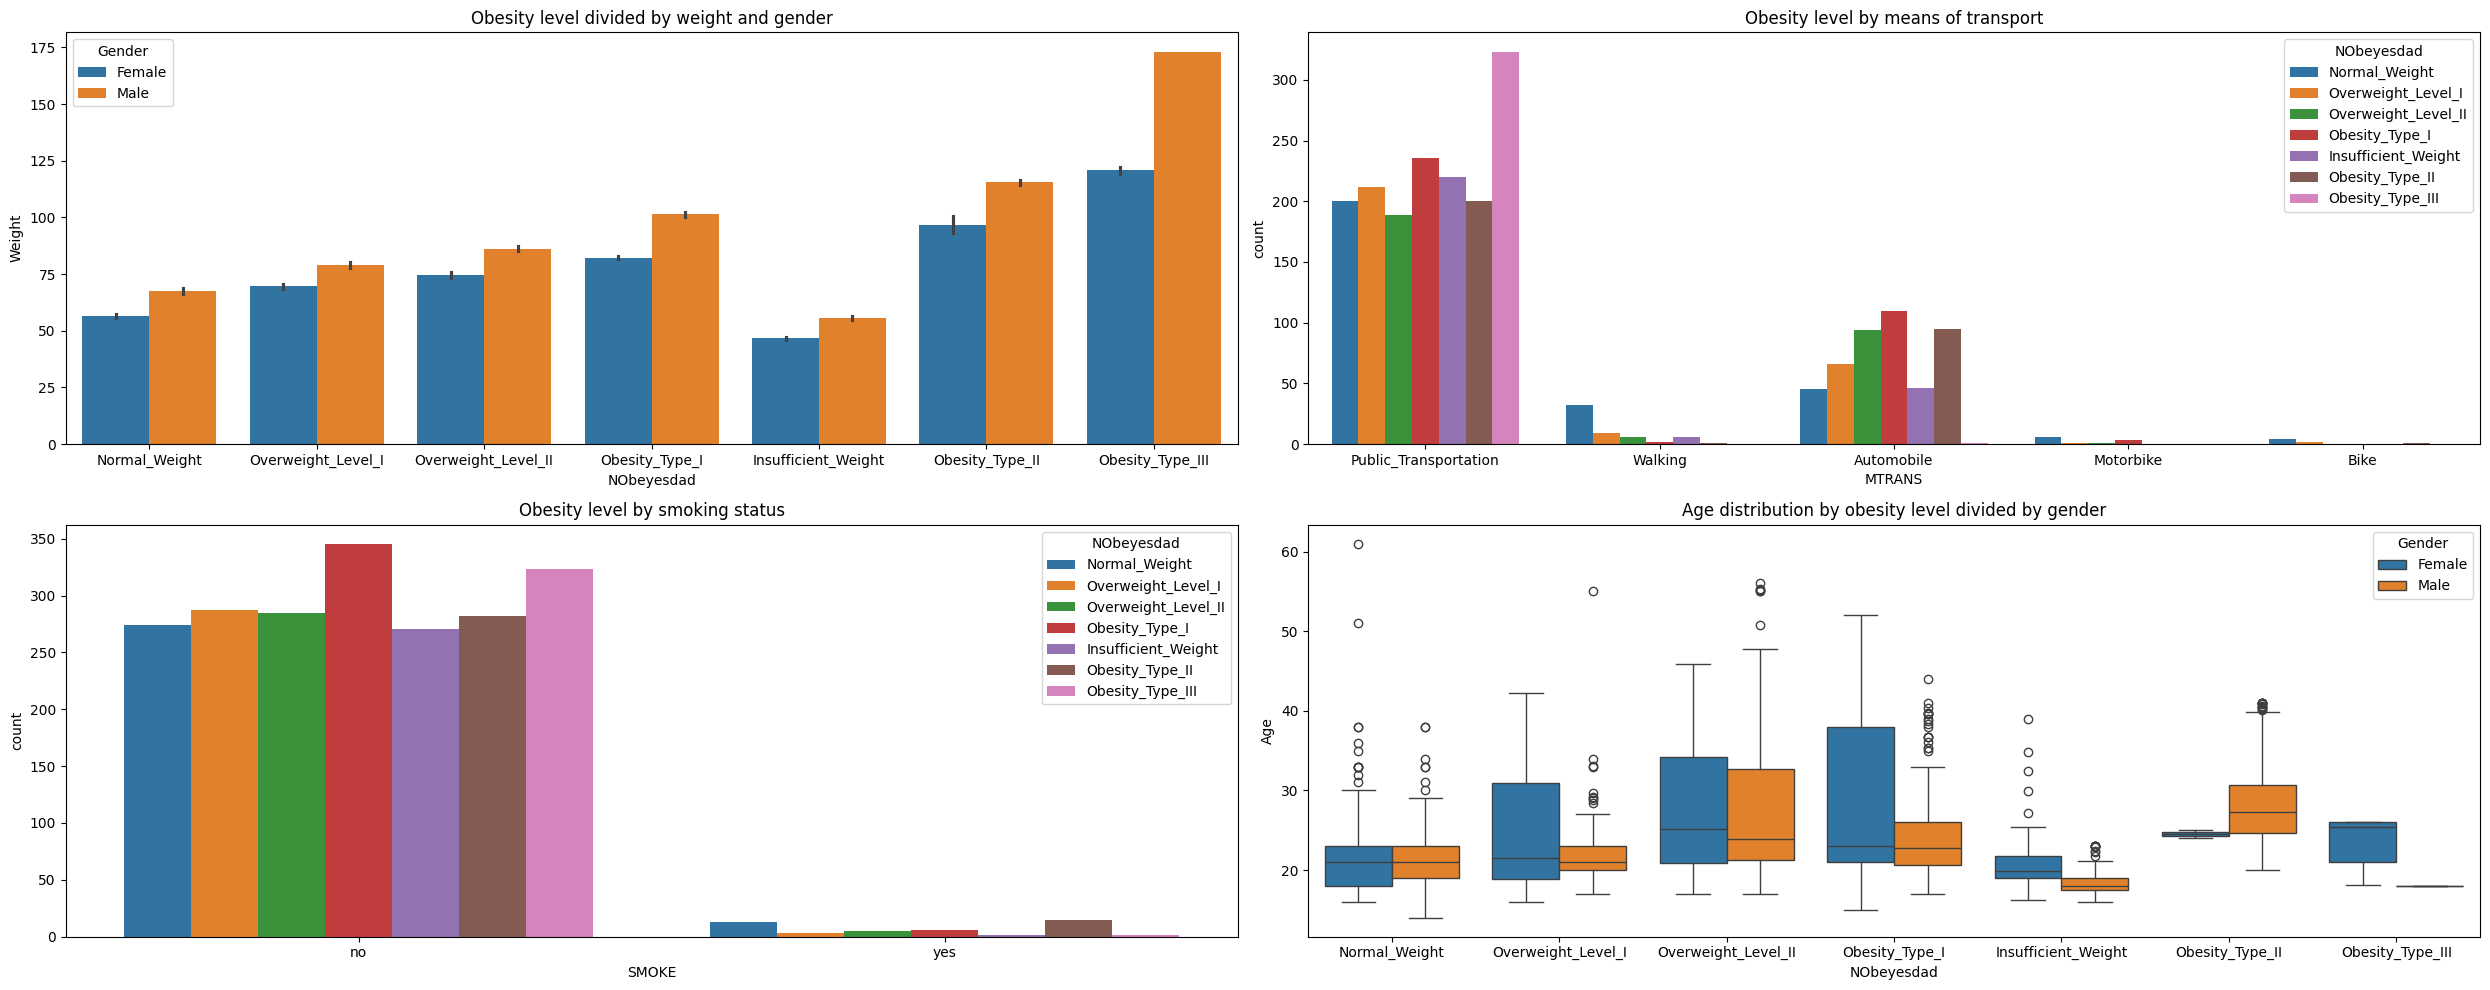

In [ ]:
if PLOT:
  #first plot: Age
  plt.figure(figsize=(25, 3))
  plt.title("Age distribution by gender")
  sns.histplot(data=dataset, x="Age", kde=True, hue="Gender")
  # second figure
  fig, axes = plt.subplots(2, 2, figsize=(25, 10))
  # second plot: Obesity level divided
  sns.barplot(data=dataset, x="NObeyesdad", y="Weight", hue="Gender", ax=axes[0, 0])
  axes[0, 0].set_title("Obesity level divided by weight and gender")
  # third plot: Obesity level by family history
  sns.countplot(data=dataset, x="MTRANS", hue="NObeyesdad", ax=axes[0, 1])
  axes[0, 1].set_title("Obesity level by means of transport")
  # fourth plot: Obesity level by smoking status
  sns.countplot(data=dataset, x="SMOKE", hue="NObeyesdad", ax=axes[1, 0])
  axes[1, 0].set_title("Obesity level by smoking status")
  # fifth plot: Age distribution by obesity level divided by gender
  sns.boxplot(data=dataset, x="NObeyesdad", y="Age", hue="Gender", ax=axes[1, 1])
  axes[1, 1].set_title("Age distribution by obesity level divided by gender")

  plt.tight_layout()
  plt.show()

### <font color = "red"> <u>**Splicing of dataset in test and training sets**</u> </font>

In [109]:
# shuffle the dataset
dataset_shuffled = dataset.sample(frac = 1, random_state = 1858)

# split the dataset into training and test sets
TRAIN_TEST_SPLIT_PERCENTAGE = 0.9 # 90% of the dataset will be used for training
dataset_training = dataset_shuffled[:int(len(dataset_shuffled) * TRAIN_TEST_SPLIT_PERCENTAGE)]
dataset_test = dataset_shuffled[int(len(dataset_shuffled) * TRAIN_TEST_SPLIT_PERCENTAGE):]

Let's split the dataset into `training_set` and `test_set`. Before doing it, we shuffle the dataset to ensure that the `test_set` contains as diverse data as possible (For instance, without shuffling, the `test_set` might solely comprise data belonging to females).-

### <font color = "red"> <u>**Encoder**</u> </font>

The `Encoder` class is designed to preprocess the training and test datasets to meet the requirements of various machine learning models. The class provides methods for transforming features, handling categorical data, and normalizing values. It ensures that the preprocessing steps applied to the training set are consistently applied to the test set.

The Encoder class provides two essential
#### Methods
  - `fit()`: Fits the encoder with characteristic values from the training set, which then are used to transform both training and test sets consistently.
  - `transform()`: Transforms the input dataset according to the stored characteristics from the training set.
  The `fit_transform()` method should only be used with the **training set**, as it stores characteristic data from the training set (calling `fit()`) for later use in transforming both training and test sets (calling `transform()`).

**Model-Specific Encoding**
- **LinearRegression** and **LogisticRegression**:
  - Maps all string features to integer values.
  - Performs one-hot encoding on specified features using `pandas.get_dummies()`.
  - Normalizes the values (except the target column) using standard normalization.
  - Adds a `Bias` column with all values set to `1`.
- **DecisionTree**:
  - Maps all string features to integer values.
  - Discretizes continuous values into bins and then indexes them.

**Problem Type Handling**
- **Regression**:
  - Moves the `Weigth` column from `X_data` to `y_data`.
- **Classification**:
 - Converts `NObeyesdad` to a binary feature according to following assumptions:
   - $1\quad if \ \ X[NObeyesdad] \in \{\text{Obesity\_Type\_I, Obesity\_Type\_II, Obesity\_Type\_III}\}$
   - $0\quad \text{otherwise}$

    then moves it from `X_data` to `y_data`.

In [ ]:
class Encoder:
  def __init__(self):
    self.models = ["LinearRegressionMP", "LinearRegressionSGD", "LogisticRegression", "DecisionTree", "KNearestNeighbor", "NeuralNetwork"]
    self.p_types = ["Regression", "Classification"]
    self.data = None
    self.bins = {}
    to_numpy = None

  #? check the inputs of the encoder
  def check_input(self, model, p_type, y_col, data):
    """
      Checks wether the inputs of the encoder are valid
    """
    if (model not in self.models) | (p_type not in self.p_types):  #? invalid model or problem type
      print(f"invalid model, {model} not in {self.models}")
      return False
    if y_col not in data.columns:                                 #? invalid target column
      print(f"invalid target column, {y_col} not in {data.columns}")
      return False
    return True

  #? maps string feature to integer
  def map_data(self, data, columns = False, exclude = False):
    """
    Maps string features to integer values.

    #### Parameters
    - `data`: the input dataset (pandas DataFrame)
    - `columns`: the column names to map (list of str, default=False)
    - `exclude`: whether to exclude the specified columns (bool, default=False)

    #### Returns
    - the modified dataset with integer-mapped string features (pandas DataFrame)
    """
    # case when we need to map all the (string) columns
    if columns == False:
      columns = data.columns

    if exclude:
      columns = set(data.columns) - set(columns)

    # mapping
    for feature in columns:
      if isinstance(data[feature].values[0], str):
        data[feature] = data[feature].map({
          #? CALC, CAEC                   #? Gender
          'Sometimes'             : 1,    'Female'                : 0,
          'Frequently'            : 2,    'Male'                  : 1,
          'Always'                : 3,

          #? NObeyesdad                   #? Binary features
          'Insufficient_Weight'   : 0,    'no'                    : 0,
          'Normal_Weight'         : 1,    'yes'                   : 1,
          'Overweight_Level_I'    : 2,
          'Overweight_Level_II'   : 3,    #? MTRANS
          'Overweight_Level_III'  : 4,    'Walking'               : 0,
          'Obesity_Type_I'        : 5,    'Bike'                  : 1,
          'Obesity_Type_II'       : 6,    'Motorbike'             : 2,
          'Obesity_Type_III'      : 7,    'Automobile'            : 3,
                                          'Public_Transportation' : 4})
    return data

  #? discretizes continuous values like weigth, age, ...
  def discretize(self, data, columns = True, exclude = False):
    """
    Discretizes continuous values into bins.

    #### Parameters
    - `data`: the input dataset (pandas DataFrame)
    - `columns`: the column names to discretize (list of str, default=True [= all columns])
    - `exclude`: whether to exclude the specified columns (bool, default=False)

    #### Returns
    - the modified dataset with discretized continuous values (pandas DataFrame)
    """
    if columns == True:
      columns = data.columns

    if exclude:
      columns = set(data.columns) - set(columns)

    for feature in columns:
      if feature in self.bins.keys():
        data[feature] = pd.cut(data[feature], bins=self.bins[feature], include_lowest=True, labels = False)

    return data

  #? normalizes values uding mean and standard deviation of the training set
  def normalize(self, data):
    """
    Normalizes the dataset using mean and standard deviation of the training set.

    #### Parameters
    - `data`: the input dataset (pandas DataFrame)

    #### Returns
    - the normalized dataset (pandas DataFrame)
    """

    data = (data - self.mean) / self.std
    return data

  #! to be used only with training set
  #? fits the encoder with carachteristic values of the training set
  def _fit(self, ds, model, p_type, y_col, to_numpy = None):
    """
    Fits the encoder with characteristic values from the training set; stores the characteristic values for later use in transforming both training and test sets.

    ##### Parameters
    - `ds`: the training dataset (pandas DataFrame)
    - `model`: the machine learning model (str)
    - `p_type`: the problem type (str)
    - `y_col`: the target column name (str).
    """
    self.data   = ds.copy()
    self.model  = model
    self.p_type = p_type
    self.y_col  = y_col
    self.to_numpy = to_numpy

    match self.model:

      case "LinearRegressionMP" | "LinearRegressionSGD" | "LogisticRegression" | "KNearestNeighbor" | "NeuralNetwork":
        # sets to None self.mean, self.std, and self.columns: see trasform()
        self.mean    = None
        self.std     = None
        self.columns = None

      case "DecisionTree":
        # Calculate the bins for columns with continuous values
        for feature in self.data.columns:
          if isinstance(self.data[feature].values[0], float):
            X_min = self.data[feature].min()
            X_max = self.data[feature].max()
            if feature in ["Age", "Weight", "Height"]:
              num_bins = 12  # granularity
            else: # feature in ["CH2O", "FAF", "TUE", "FCVC", "NCP"]:
              num_bins = 4
            step = (X_max - X_min) / num_bins
            self.bins[feature] = [0] if X_min != 0 else []
            self.bins[feature] += [X_min + i * step for i in range(int((X_max-X_min)/step) + 2)]
            self.bins[feature] += [np.inf]

  #? this function transforms the dataset in input according to the data of the training set stored with the fit() function
  def transform(self, ds):
    """
    Transforms the input dataset according to the characteristics stored during the `fit` step.

    #### Parameters
    - `ds`: the input dataset (pandas DataFrame)

    #### Returns
    - `X_data`: the transformed feature matrix (pandas DataFrame or numpy array)
    - `y_data`: the target variable (numpy array)
    """

    X_data = ds.copy()

    match self.model:
      case "DecisionTree":

        # map values from string to integer
        X_data = self.map_data(X_data)

        # discretize continuous values into integers
        X_data = self.discretize(X_data)

      case _:
          # map values from string to integer
          X_data = self.map_data(X_data, columns = ["Gender", "MTRANS"], exclude = True)      # map string values into integers

          # one hot encoding of categorical features
          X_data = pd.get_dummies(X_data, dtype = int, columns = ["Gender", "MTRANS"])

          # Management of missing columns in the training test
          if self.columns is not None: #! only test set should pass
            missing_cols = set(self.columns) - set(X_data.columns) #? missing columns = train_set columns - test_set columns
            # Add a missing column in test set with 0 as default value
            for c in missing_cols:
              X_data[c] = 0
            # Ensure the order of column in the test set is in the same order than in train set
            X_data = X_data[self.columns]

          else: #! only train_set should pass
            # here is where the encoder stores the columns from the training set
            self.columns = X_data.columns
            # calculate and saves mean and std of the training set
            self.mean = X_data.mean()
            self.std = X_data.std()
            # to not normalize target column
            self.mean[self.y_col] = 0
            self.std[self.y_col] = 1

          # normalize data using standard normalization
          X_data = self.normalize(X_data[self.columns])

          if self.model != "NeuralNetwork":
            X_data['Bias'] = 1 # Add a column of '1's for the bias vector
          else: X_data['Bias'] = 0

    #? -------- creating X_data and y_data --------
    match self.p_type:

      case "Regression":
        y_data = X_data.pop(self.y_col).values

      case "Classification":
        y_data = X_data.pop(self.y_col).values
        if self.y_col == "NObeyesdad":
          y_data = (y_data > 4).astype(int)

    X_data = X_data.reset_index(drop = True)

    if self.model == "NeuralNetwork":
      y_data = y_data.reshape(-1, 1)
    if self.to_numpy is None and self.model == "DecisionTree" or self.to_numpy == True:
      X_data = X_data.to_numpy()

    return X_data, y_data

  #? This function stores training set data using fit() for later use in transform() to transform both training and test sets consistently to the model requirements.
  def fit_transform(self, ds, model, p_type, y_col, to_numpy = None):
    """
    !! Should be used only with the training set !!

    Stores characteristic data from the training set to ensure the test set is encoded with the same features and normalization values (means and standard deviations). Transforms the training set accordingly.
    #### Parameters
    - `ds`: The training dataset.
    - `model`: The model type (e.g., `LinearRegressionMP`, `LinearRegressionSGD`, `LogisticRegression`...).
    - `p_type`: The problem type (`Regression` or `Classification`).
    - `y_col`: The target column.
    """

    if not self.check_input(model, p_type, y_col, ds):
      return None, None

    #? ------------ saving  utilities ------------
    self._fit(ds.copy(), model, p_type, y_col, to_numpy)

    #? ------------ transforming data ------------
    X_data, y_data = self.transform(ds)

    return X_data, y_data

#### <font color = "DeepSkyBlue"> **Example of data encoded** </font>
**Linear Regression**:


In [ ]:
e = Encoder()
X_train, y_train = e.fit_transform(dataset_training, "LinearRegressionMP", "Regression", "Weight")
df = X_train
df["y = Weight"] = y_train
display(df.head(10))


,Age,Height,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,...,NObeyesdad,Gender_Female,Gender_Male,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,Bias,y = Weight
0,0.850427,2.246723,0.476051,0.363744,-0.620542,0.402687,-0.295778,-0.14851,-0.812284,-0.222991,...,1.006876,-0.984584,0.984584,-0.525418,-0.056284,-0.072739,0.579022,-0.1644,1,129.679131
1,0.261535,-0.467522,0.476051,0.363744,-0.786467,0.402687,-0.295778,-0.14851,1.610839,-0.222991,...,0.596211,-0.984584,0.984584,1.902244,-0.056284,-0.072739,-1.726141,-0.1644,1,90.000000
2,-0.153867,0.055127,0.476051,0.363744,0.681320,-0.725264,-0.295778,-0.14851,1.584890,-0.222991,...,-0.225120,-0.984584,0.984584,-0.525418,-0.056284,-0.072739,0.579022,-0.1644,1,82.011962
3,-0.307951,1.828005,0.476051,0.363744,0.777836,-0.014566,-0.295778,-0.14851,-0.498786,-0.222991,...,1.006876,-0.984584,0.984584,-0.525418,-0.056284,-0.072739,0.579022,-0.1644,1,121.458232
4,-0.648440,0.006324,0.476051,0.363744,0.436680,-1.827026,-0.295778,-0.14851,-1.060785,-0.222991,...,1.006876,-0.984584,0.984584,-0.525418,-0.056284,-0.072739,0.579022,-0.1644,1,104.578255
5,-0.519808,1.070049,0.476051,0.363744,1.084586,0.402687,1.831805,-0.14851,-1.664128,-0.222991,...,-1.046451,-0.984584,0.984584,-0.525418,-0.056284,-0.072739,0.579022,-0.1644,1,75.000000
6,-0.835258,-1.516096,-2.099508,0.363744,-0.786467,-2.168274,-0.295778,-0.14851,-1.664128,-0.222991,...,-1.046451,1.015122,-1.015122,-0.525418,-0.056284,-0.072739,0.579022,-0.1644,1,50.000000
7,-0.677533,-2.162632,-2.099508,0.363744,-0.786467,0.402687,-0.295778,-0.14851,-1.664128,-0.222991,...,-1.046451,1.015122,-1.015122,1.902244,-0.056284,-0.072739,-1.726141,-0.1644,1,44.000000
8,-0.519808,-0.869560,-2.099508,0.363744,-0.786467,-2.168274,-2.423360,-0.14851,1.610839,-0.222991,...,-0.635785,-0.984584,0.984584,-0.525418,-0.056284,-0.072739,0.579022,-0.1644,1,70.000000
9,-0.204358,-0.914236,0.476051,0.363744,-0.786467,-2.168274,-0.295778,-0.14851,-0.026644,-0.222991,...,0.596211,1.015122,-1.015122,-0.525418,-0.056284,-0.072739,0.579022,-0.1644,1,80.615325


As you can see, after performing one-hot encoding, the data is normalized using mean and standard deviation. We now have a dataset with 23 columns, where the values are centered around 0. Note that the y column is not normalized.

**Decision Tree**:

In [ ]:
e = Encoder()
X_train, y_train = e.fit_transform(dataset_training, "DecisionTree", "Classification", "NObeyesdad", to_numpy = False)
df = X_train
df["y = NObeyesdad"] = y_train
display(df.head(10))

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,y = NObeyesdad
0,1,5,11,9,1,1,4,4,1,0,2,0,3,0,1,4,1
1,1,4,5,6,1,1,3,4,1,0,6,0,0,2,1,3,1
2,1,3,6,5,1,1,6,3,1,0,6,0,4,0,1,4,0
3,1,3,10,9,1,1,6,4,1,0,3,0,1,0,1,4,1
4,1,2,6,7,1,1,5,1,1,0,2,0,0,2,0,4,1
5,1,2,8,4,1,1,6,4,2,0,0,0,3,0,1,4,0
6,0,2,3,2,0,1,3,0,1,0,0,0,0,5,0,4,0
7,0,2,2,1,0,1,3,4,1,0,0,0,0,0,1,3,0
8,1,2,4,4,0,1,3,0,0,0,6,0,1,0,1,4,0
9,0,3,4,5,1,1,3,0,1,0,3,0,0,0,0,4,1


This dataset differs from the previous one in that a decision tree does not require one-hot encoding. Instead, each distinct value in a column corresponds to an edge in the tree, necessitating discretization. Consequently, we have a smaller dataset with only 16 columns.

### <font color = "red"> <u>**Metrics used**</u> </font>

#### <font color = "DeepSkyBlue"> <u>**Mean Square Error**</u> </font>

The Mean Squared Error is a metric used to measure the performance of a regression model. It quantifies the average squared difference between the predicted values and the actual values. The MSE is calculated using the following formula:

$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

Where:
- $n$: The total number of instances in the dataset
- $y_i$: The actual value of the $i$-th instance
- $\hat{y}_i$: The predicted value of the $i$-th instance

The MSE ranges from 0 to infinity, with lower values indicating better performance. A perfect model would have an MSE of 0.


We utilize the `mean_squared_error(y_true, y_pred)` function from the scikit-learn library to compute the accuracy metric.

#### <font color = "DeepSkyBlue"> <u>**Mean Absolute Error**</u> </font>

The Mean Absolute Error (MAE) is another metric used to evaluate the performance of a regression model. It measures the average absolute difference between the predicted values and the actual values. The MAE is calculated using the following formula:

$$
MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
$$
Where:
- $n$: The total number of instances in the dataset
- $y_i$: The actual value of the $i$-th instance
- $\hat{y}_i$: The predicted value of the $i$-th instance


The MAE ranges from 0 to infinity, with lower values indicating better performance. Unlike MSE, MAE is less sensitive to outliers, providing a more robust measure of average prediction error.

We utilize the mean_absolute_error(y_true, y_pred) function from the scikit-learn library to compute this metric.

#### <font color = "DeepSkyBlue"> <u>**Accuracy score**</u> </font>


The accuracy score is a metric used to evaluate the performance of a classification model. It measures the proportion of correct predictions made by the model compared to the total number of predictions. The accuracy score is calculated using the following formula:

$$
\text{Accuracy} = \frac{1}{n} \sum_{i=1}^{n} I(\hat{y}_i = y_i)
$$

Where:
- $n$: The total number of instances in the dataset
- $\hat{y}_i$: The predicted class label for the $i$-th instance
- $y_i$: The true class label for the $i$-th instance
- $I(x)$: The indicator function, which equals 1 if the condition $x$ is true, and 0 otherwise

The accuracy score ranges from 0 to 1, with 1 indicating perfect classification and 0 indicating complete misclassification. It provides an overall measure of the model's performance in correctly predicting the class labels of the instances in the dataset.

We utilize the `accuracy_score(y_true, y_pred)` function from the scikit-learn library to compute the accuracy metric.

## <font color = "a800ff"> <u>**Models**</u> </font>

### <font color = "red"> <u>**Linear Regression - Moore Penrose**</u> </font>

Linear regression is a fundamental technique in machine learning and statistics, used to model the relationship between a dependent variable and one or more independent variables. The Moore-Penrose inverse, also known as the pseudoinverse, provides a robust solution by finding the least-squares approximation that minimizes the sum of squared residuals. By employing the Moore-Penrose inverse, linear regression can be formulated as a matrix equation, where the pseudoinverse of the design matrix is used to obtain the coefficients that best approximate the relationship between the variables.

We firstly have to calculate the $c$ coefficient with the **Moore-Penrose inverse**:
$$
X^+ = (X^\top X)^{-1}X^\top
$$
so $c$ is:
$$ c = X^+y = (X^\top X)^{-1}X^\top y $$
to do that we use the numpy `pinv` function

then we can predict the weight:
$$
y = X\cdot c
$$

In [ ]:
class LinearRegressionMP:
  """
  Linear regression model using the Moore-Penrose pseudoinverse method.

  #### Attributes
    c (ndarray): Coefficient vector.

  #### Methods
    fit(X, y): Fit the linear regression model to the training data.
    predict(X): Predict the target variable for new input data.

  """

  def __init__(self):
    self.c = None

  def fit(self, X, y):
    """
    Fit the linear regression model to the training data.

    #### Parameters
      X (ndarray): Input features.
      y (ndarray): Target variable.

    """
    self.c = np.linalg.pinv(X).dot(y)

  def predict(self, X):
    """
    Predict the target variable for new input data.

    #### Parameters
      X (ndarray): Input features.

    Returns:
      ndarray: Predicted target variable.

    """
    return X.dot(self.c)

### <font color = "red"> <u>**Linear Regression - Stochastic Gradient Descent**</u> </font>


The Stochastic Gradient Descent (SGD) algorithm aims to minimize the cost function by iteratively updating the model parameters in the direction of steepest descent.

Firstly, the algorithm initialize the model parameters (weights and bias) with random values, then splits the dataset into small batches.
For each batch:
  - Computes the predicted values using the current model parameters.
  - Calculates the error between the predicted values and the actual target values.
  - Updates the model parameters using the gradient of the cost function with respect to the parameters.

The algorithm repeats the above steps until convergence or a maximum number of iterations is reached.
Finally, returns the final model parameters.

The update rule for the model parameters in SGD is given by:

$$\theta_{t+1} = \theta_t - \alpha \cdot \nabla J(\theta_t)$$

where:
- $\theta_t$ represents the model parameters at iteration t.
- $\alpha$ is the learning rate, which controls the step size of the parameter updates.
- $\nabla J(\theta_t)$ is the gradient of the cost function with respect to the parameters.

The cost function used in linear regression is the Mean Squared Error (MSE) - see `Test section` for more information about the metrics -

The gradient of the cost function with respect to the parameters is given by:

$$\nabla J(\theta) = x_i^\top \cdot (y_i - y\_pred_i)$$

where:
- $x_i$ represents the input features for the i-th batch.
- $y_i$ is the true target column for the batch
- $y\_pred_i$ is the column of the predictions for the i-th batch

By iteratively updating the model parameters using the SGD algorithm, the LinearRegressionSGD class can effectively learn the optimal weights and bias for the linear regression model, resulting in a good fit to the training data.

In [ ]:
class LinearRegressionSGD:
  """
  Linear Regression with Stochastic Gradient Descent (SGD).

  #### Parameters
    learn_rate (float): The learning rate for SGD. Default is 6e-06.
    max_iter (int): The maximum number of iterations. Default is 1000.
    batch_size (int): The batch size for SGD. Default is 15.
    div (int): The divisor for reducing the learning rate. Default is 2.
    patience (int): The patience for early stopping. Default is 10.
    verbose (bool): Whether to print verbose output. Default is None.

  #### Attributes
    plot (bool): Whether to plot the loss curve. Default is PLOT.
    verbose (bool): Whether to print verbose output. Default is VERBOSE.
    learn_rate (float): The learning rate for SGD.
    max_iter (int): The maximum number of iterations.
    batch_size (int): The batch size for SGD.
    weights (ndarray): The weights for linear regression.
    div (int): The divisor for reducing the learning rate.
    patience (int): The patience for early stopping.
    tollerance (float): The tolerance for early stopping.

  #### Methods
    fit(X_train, y_train): Fit the linear regression model to the training data.
    predict(X_test): Predict the target variable for the test data.
  """

  def __init__(self, learn_rate=6e-06, max_iter=1000, batch_size=15, div=2, patience=10, verbose=None):
    self.plot = PLOT if verbose is None else verbose
    self.verbose = VERBOSE if verbose is None else verbose
    self.learn_rate = learn_rate
    self.max_iter = max_iter
    self.batch_size = batch_size
    self.weights = None
    self.div = div
    self.patience = patience
    self.tollerance = 1e-6
    metrics["LinearRegressionSGD"] = []

  def fit(self, X_train, y_train):
    """
    Fit the linear regression model to the training data.

    #### Parameters
      X_train (ndarray): The training input samples.
      y_train (ndarray): The target values for the training data.
    """
    n_samples, n_features = X_train.shape
    self.weights = np.random.RandomState(15).randn(n_features)  # Initialize weights randomly
    best_cost = float('inf')
    patience_counter = 0

    for epoch in range(self.max_iter + 1):
      # Shuffle training data
      indices = np.random.RandomState(15).permutation(n_samples)
      X_train_shuffled = X_train.to_numpy()[indices]
      y_train_shuffled = y_train[indices]

      for i in range(0, n_samples, self.batch_size):
        X_batch = X_train_shuffled[i:i+self.batch_size]
        y_batch = y_train_shuffled[i:i+self.batch_size]

        # Compute predictions
        y_pred = np.dot(X_batch, self.weights)

        # Compute gradients
        error = y_batch - y_pred
        gradient = - np.dot(X_batch.T, error)

        # Update weights
        self.weights -= self.learn_rate * gradient

      y_pred = self.predict(X_train)
      loss = mse(y_train, y_pred)

      # Early stopping
      if epoch > self.batch_size:
        if loss < best_cost - self.tollerance:
          best_cost = loss
          patience_counter = 0
        else:
          patience_counter += 1
          if patience_counter >= self.patience:
            if self.verbose:
              print(f"Early stopping at epoch {epoch}, loss = {loss}")
            break

      if epoch % 250 == 0:
        self.learn_rate /= self.div

      if self.plot:
        metrics["LinearRegressionSGD"].append(loss)

      if self.verbose:
        if epoch % 200 == 0 or epoch == self.max_iter:
          print(f"Epoch {epoch}:\tLoss {loss}")

    plt.plot(metrics["LinearRegressionSGD"]) if self.plot else None

  def predict(self, X_test):
    """
    Predict the target variable for the test data.

    #### Parameters
      X_test (ndarray): The test input samples.

    #### Returns
      ndarray: The predicted target values for the test data.
    """
    return np.dot(X_test, self.weights)


### <font color = "red"> <u>**Logistic Regression**</u> </font>

Logistic regression is a powerful algorithm employed for binary classification tasks. Its objective is to identify the optimal logistic regression model capable of predicting the probability of the dependent variable assuming a value of 1, based on the independent variables.
The predictions are computed using the sigmoid function, which scales the results within the range of 0 and 1. The sigmoid function is defined as:
$$
\sigma(z) = \frac{1}{1+e^{-z}}
$$

A crucial step in the training process is the calculation of the gradient, which is used to update the model parameters. The gradient for logistic regression can be computed as follows:
$$
\nabla = \frac{1}{m}\mathbf{X}^T(\mathbf{y} - \hat{\mathbf{y}})
$$
Where:

- $\nabla$ is the gradient vector
- $m$ is the number of training examples
- $\mathbf{X}$ is the input data matrix
- $\mathbf{y}$ is the vector of true labels
- $\hat{\mathbf{y}}$ is the vector of predicted probabilities
- $\cdot$ denotes element-wise multiplication

To enhance the performance of the logistic regression algorithm, I implemented a stochastic batch logic approach. In stochastic batch logistic regression, the algorithm updates the model parameters using a randomly selected subset of the training data, known as a mini-batch.
By randomly selecting mini-batches, the algorithm can update the model parameters more frequently, leading to faster convergence rates. Additionally, stochastic batch logistic regression can effectively handle non-linear decision boundaries and is less susceptible to overfitting compared to traditional batch logistic regression.

It is important to note that stochastic batch logistic regression introduces randomness into the parameter updates, which can lead to fluctuations in the training process. However, these fluctuations often help the algorithm escape local minima and find better solutions.

In [ ]:

class LogisticRegression:
  """
  Logistic Regression classifier.

  #### Parameters
    alpha (float): The learning rate. Default is 0.5.
    n_iter (int): The number of iterations. Default is 100.
    batch_size (int): The batch size for gradient descent. Default is 7.
    patience (int): The number of iterations to wait for improvement in cost before early stopping. Default is 15.
    verbose (bool): Whether to print verbose output during training. Default is None.

  #### Attributes
    theta (ndarray): The learned weights.
    batch_size (int): The batch size for gradient descent.
    alpha (float): The learning rate.
    n_iter (int): The number of iterations.
    patience (int): The number of iterations to wait for improvement in cost before early stopping.
    verbose (bool): Whether to print verbose output during training.

  #### Methods
    sigmoid(z): Compute the sigmoid function.
    compute_cost(X, y): Compute the cost and gradient for logistic regression.
    gradient_descent(X, y): Perform gradient descent to learn the weights.
    fit(X, y): Fit the logistic regression model to the training data.
    predict(X, threshold): Predict the class labels for the input data.

  """

  def __init__(self, alpha=0.5, n_iter=100, batch_size=7, patience=15, verbose=None):
    self.plot = PLOT if verbose is None else verbose
    self.verbose = VERBOSE if verbose is None else verbose
    self.theta = None
    self.batch_size = batch_size
    self.alpha = alpha
    self.n_iter = n_iter
    self.patience = patience

  def sigmoid(self, z):
    """
    Compute the sigmoid function.

    #### Parameters
      z (ndarray): The input values.

    #### Returns
      ndarray: The sigmoid of the input values.
    """
    return 1 / (1 + np.exp(-z))

  def compute_cost(self, X, y):
    """
    Compute the cost and gradient for logistic regression.

    #### Parameters
      X (ndarray): The input features.
      y (ndarray): The target labels.

    #### Returns
      float: The cost.
      ndarray: The gradient.
    """
    m = len(y)
    y_pred = self.sigmoid(np.dot(X, self.theta))
    y_pred_acc = (y_pred >= 0.5).astype(int)
    cost = acc(y, y_pred_acc)
    grad = np.dot(X.T, (y - y_pred)) / m
    return cost, grad

  def gradient_descent(self, X, y):
    """
    Perform gradient descent to learn the weights.

    #### Parameters
      X (ndarray): The input features.
      y (ndarray): The target labels.
    """
    best_cost = float('inf')
    patience_counter = 0
    m = len(y)
    X = X.to_numpy()
    metrics["LogisticRegression"] = []

    for epoch in range(self.n_iter):
      permutation = np.random.RandomState(15).permutation(m)
      X_shuffled = X[permutation]
      y_shuffled = y[permutation]
      for j in range(0, m, self.batch_size):
        X_batch = X_shuffled[j:j + self.batch_size]
        y_batch = y_shuffled[j:j + self.batch_size]

        acc, grad = self.compute_cost(X_batch, y_batch)
        self.theta += self.alpha * grad

      if self.plot:
        metrics["LogisticRegression"].append(acc)

      #? ------------- Early stopping -------------
      if epoch > self.batch_size // 5:  # min iter
        if acc > best_cost:
          best_cost = acc
          patience_counter = 0
        else:
          patience_counter += 1
          if patience_counter >= self.patience:
            print(f"Early stopping at epoch {epoch}, acc = {acc}") if self.verbose else None
            break

      #? -------------- Verbose print --------------
      if self.verbose and epoch % 25 == 0:
        print(f"Epoch {epoch},\tAccuracy: {acc}")

    plt.plot(metrics["LogisticRegression"]) if self.plot else None

  def fit(self, X, y):
    """
    Fit the logistic regression model to the training data.

    #### Parameters
      X (ndarray): The input features.
      y (ndarray): The target labels.
    """
    self.theta = np.random.RandomState(15).randn(X.shape[1]) * 0.01
    self.gradient_descent(X, y)

  def predict(self, X, threshold=0.5):
    """
    Predict the class labels for the input data.

    #### Parameters
      X (ndarray): The input features.
      threshold (float): The threshold for class prediction. Default is 0.5.

    #### Returns
      ndarray: The predicted class labels.
    """
    return (self.sigmoid(np.dot(X, self.theta)) >= threshold).astype(int)

---

### <font color = "red"> <u>**Decision Tree**</u> </font>

A decision tree is a tree-like model constructed during the training phase by analyzing the values of individual samples and creating new branches of the tree whenever a new value is encountered. The leaves of the various branches contain the most common value of the target variable (y) among the samples that reach them. During the prediction phase, the model traverses the previously constructed tree for each sample in the test set. When it reaches a leaf node, it returns the value stored in that node, which corresponds to the plurality value (most frequent value) of the target variable for the samples that reached that node. If an unknown value is encountered during the traversal, the model returns the plurality value of the preceding node.

<u>**Tree Construction**</u>

The construction of the decision tree is based on the concept of information gain, which measures the reduction in entropy achieved by splitting the data according to a particular feature. The algorithm recursively partitions the data by selecting the feature that maximizes the information gain at each node, creating new branches for each distinct value of the selected feature.
The process continues until a stopping criterion is met, such as reaching a maximum depth, having a node with only one class, or when further splitting doesn't provide significant information gain.

We can calculate the ***Entropy*** of each feature of the dataset, as follows:
$$ Entropy = H(A) = - ∑_{x \in A} P(x) \log_2(P(x)) $$

In our case, we use the ***binary Entropy*** formula:

$$ B(q) = - (q \log_2(q) + (1 - q) \log_2(1 - q)) $$

where $q$ is the probability of success for the feature $A$.

Then we can calculate the ***Information Gain***. To do that we need to calculate the ***Reminder*** first:
$$
Remainder(A) = ∑_{k=1}^d \frac{p_k + n_k}{p + n} B(q) %#\left( \frac{p_k}{ p_k + n_k}\right)
$$

Then we can calculate the ***Information Gain*** as:

$$
Gain(A) = B\left(\frac{p}{p+n}\right) - Remainder(A)
$$

`information_gain(y, X)` calculates the information gian the features in X and returns them as a sorted dictionary

The `find_best_feature(y, X, attributes)` function is used to find the best feature (attribute) from a given set of attributes (`attributes`) that maximizes the information gain in a dataset (`X`) when predicting a target variable (`y`).

<u>**My implementation**</u>

I decided to implement a n-ary tree. This decision was driven by the belief that an n-ary tree would better accommodate the characteristics of the given dataset, with continuous values in a wide range, as `Weight`, `Age` and `Height`. Discretizing the dataset i allowed more appropriate partitioning of samples across the tree nodes without relying on the calculation of a single split value.

The `Node` class serves as the basic unit of the tree, initialized with:
- **feature**: The feature used for splitting the data at this node.
- **value**: The value associated with the node, particularly for leaf nodes.
- **max_depth**: The maximum depth of the tree.
- **edges**: A dictionary storing child nodes.
- **root**: A reference to the root node.
- **most_used_value**: The most frequent value for the feature at this node, useful for handling unknown feature values during prediction.

The `DecisionTree` class extends the `Node` class and implements the decision tree’s functionality, including:
- `plurality_value()`: Returns the most common class in the target variable $y$. Is used for handling leaf nodes when splitting is no longer feasible due to homogeneity in the data or reaching the maximum depth.
- `grow_tree()`: Recursively builds the tree by selecting the best feature to split on, based on information gain (calculated using entropy), and creating subtrees for each unique feature value.
- `fit` Fits the tree to the training data by initiating the `grow_tree` method.
- `predict` Predicts the target variable for test data by applying the `_predict_recursive` method.
- `_predict_recursive` Recursively navigates the tree to make predictions, defaulting to the `most_used_value` if an unknown feature value is encountered.

In [ ]:
class Node:
    def __init__(self, feature=None, value=None, max_depth=None):
        self.feature = feature
        self.value = value
        self.edges = {}
        self.max_depth = max_depth
        self.most_used_value = None

class DecisionTree(Node):
  """
  A decision tree classifier.

  #### Parameters
  - `feature`: The feature used for splitting the data at each node (default: None).
  - `value`: The value associated with the feature used for splitting the data at each node (default: None).
  - `max_depth`: The maximum depth of the decision tree (default: 5).
  - `verbose`: Whether to print verbose output during tree construction (default: None).

  #### Attributes
  - `verbose`: Whether to print verbose output during tree construction.
  - `root`: The root node of the decision tree.

  #### #### Methods
  - `plurality_value`: Returns the majority class label in a given set of labels.
  - `grow_tree`: Recursively grows the decision tree by splitting the data based on the best feature.
  - `fit`: Fits the decision tree to the given training data.
  - `predict`: Predicts the class labels for the given test data.
  - `_predict_recursive`: Recursively predicts the class label for a single example.
  - `find_best_feature`: Finds the best feature for splitting the data based on information gain.
  - `information_gain`: Calculates the information gain of a split on a particular feature.
  - `entropy`: Calculates the entropy of a given data distribution.
  - `print_tree`: Prints the decision tree in a readable format.
  - `_print`: Recursively prints the nodes of the decision tree.
  """

  def __init__(self, feature=None, value=None, max_depth=5, verbose=None):
    super().__init__(feature, value, max_depth)
    self.verbose = verbose

  def plurality_value(self, y):
    """
    Returns the majority class label in a given set of labels.

    #### Parameters
    - `y`: Array containing the class labels.

    #### Returns
    - Majority class label (0 or 1).
    """
    return int(np.mean(y) >= 0.5)

  def grow_tree(self, y, X, attributes, parent_y, max_depth):
    """
    Recursively grows the decision tree by splitting the data based on the best feature.

    #### Parameters
    - `y`: Array containing the class labels.
    - `X`: Array containing the features.
    - `attributes`: An iterator of the features of the dataset among which to search for the best one.
    - `parent_y`: Array containing the class labels of the parent node.
    - `max_depth`: The maximum depth of the decision tree.

    #### Returns
    - The root node of the decision tree.
    """
    sum_y = np.sum(y)
    if (sum_y == len(y)) or (sum_y == 0):
      return Node(value=int(sum_y / len(y)))
    if len(attributes) == 0 or max_depth <= 0:
      return Node(value=self.plurality_value(parent_y))

    best_feature = self.find_best_feature(y, X, attributes)
    tree = Node(feature=best_feature)

    values, counts = np.unique(X[:, best_feature], return_counts=True)
    tree.most_used_value = values[np.argmax(counts)]

    for value in values:
      indices = X[:, best_feature] == value
      filtered_X = X[indices]
      filtered_y = y[indices]

      if len(filtered_y) == 0:
        child = Node(value=self.plurality_value(y))
      else:
        child = self.grow_tree(filtered_y, filtered_X, attributes - {best_feature}, y, max_depth - 1)
      tree.edges[value] = child

    return tree

  def fit(self, X, y):
    """
    Fits the decision tree to the given training data.

    #### Parameters
    - `X`: Array or DataFrame containing the features.
    - `y`: Array or Series containing the class labels.
    """
    if isinstance(X, pd.DataFrame):
      X = X.to_numpy()
    if isinstance(y, pd.Series):
      y = y.to_numpy()
    attributes = set(range(X.shape[1]))
    self.root = self.grow_tree(y, X, attributes, y, self.max_depth)

  def predict(self, X_test):
    """
    Predicts the class labels for the given test data.

    #### Parameters
    - `X_test`: Array or DataFrame containing the test features.

    #### Returns
    - Array of predicted class labels.
    """
    if isinstance(X_test, pd.DataFrame):
      X_test = X_test.to_numpy()
    return np.apply_along_axis(lambda x: self._predict_recursive(x, self.root), 1, X_test)

  def _predict_recursive(self, example, node):
    """
    Recursively predicts the class label for a single example.

    #### Parameters
    - `example`: Array containing the features of a single example.
    - `node`: The current node in the decision tree.

    #### Returns
    - Predicted class label (0 or 1).
    """
    if node.value is not None:
      return node.value
    feature_value = example[node.feature]
    if feature_value not in node.edges:
      next_node = node.edges[node.most_used_value]
    else:
      next_node = node.edges[feature_value]
    return self._predict_recursive(example, next_node)

  def find_best_feature(self, y, X, attributes):
    """
    Finds the best feature for a data set (X, y) based on the information gain.

    #### Parameters
    - `y`: Array containing the class labels.
    - `X`: DataFrame containing the features.
    - `attributes`: An iterator of the features of the dataset among which to search for the best one.

    #### Returns
    - Name of the feature with the best information gain.
    """
    gains = self.information_gain(y, X, attributes)
    best_feature = max(gains, key=gains.get)
    return best_feature

  def information_gain(self, y, X, attributes):
    """
    Calculates the information gain of a split on a particular feature.

    #### Parameters
    - `y`: numpy array or pandas Series, representing the target variable.
    - `X`: pandas DataFrame, representing the features.

    #### Returns
    - Dictionary where the keys are the feature names and the values are the information gain for each feature.
    """
    gain = {}
    total_pos = np.sum(y)
    total_neg = len(y) - total_pos
    parent_entropy = self.entropy(total_pos / (total_pos + total_neg))

    for feature_idx in attributes:
      feature_values = X[:, feature_idx]
      unique_values = np.unique(feature_values)
      remainder = 0
      for value in unique_values:
        indices = feature_values == value
        filtered_y = y[indices]
        pos = np.sum(filtered_y)
        neg = len(filtered_y) - pos
        if len(filtered_y) == 0:
          continue
        prob = pos / (pos + neg)
        remainder += ((pos + neg) / len(y)) * self.entropy(prob)
      gain[feature_idx] = parent_entropy - remainder
    return gain

  def entropy(self, q):
    """
    Calculates the entropy of a given data distribution.

    #### Parameters
    - `q`: The probability of the positive class (float).

    #### Returns
    - The entropy value.
    """
    if (q == 0) or (q == 1):  # avoid log(0)
      return 0
    return -(q * np.log2(q) + (1 - q) * np.log2(1 - q))

  def print_tree(self):
    """
    Prints the decision tree in a readable format.
    """
    self._print(node=self.root)

  def _print(self, node, indent_arr=[], parent_value=None, is_edge=False):
    """
    Recursively prints the nodes of the decision tree.

    #### Parameters
    - `node`: The current node in the decision tree.
    - `indent_arr`: List of integers representing the indentation level for each node.
    - `parent_value`: The value associated with the parent node.
    - `is_edge`: Whether the current node is the last child of its parent.
    """
    indent = ""
    if not len(indent_arr):
      prefix = "Root──"
    else:
      indent = "      "
      for i in range(len(indent_arr) - 1):
        indent += " │  " if indent_arr[i] else "    "
      prefix = "├── " if not is_edge else "└── "

    if node.value is not None:
      # Leaf Node
      node_info = f"{prefix}[Value {parent_value}] Return: {node.value}"
    else:
      # Decision Node
      node_info = f"{prefix}[Value {parent_value}] Feature: {node.feature}"

    print(f"{indent} {node_info}")

    # Recursively print all child nodes
    children = list(node.edges.items())
    is_edge = False
    for i, (value, child) in enumerate(children):
      if i >= len(children) - 1:
        is_edge = True
        indent_arr.append(0)
      else:
        indent_arr.append(1)
      self._print(child, indent_arr=indent_arr, parent_value=value, is_edge=is_edge)
      indent_arr.pop()


In [ ]:
df = pd.DataFrame()
e = Encoder()
X_train, y_train = e.fit_transform(dataset_training, "DecisionTree", "Classification", "NObeyesdad", to_numpy = False)
tree = DecisionTree()
gain = tree.information_gain(y_train, X_train.to_numpy(), set(range(X_train.shape[1])))
keys = X_train.columns
values = gain.values()
df["Feature"] = keys
df["information gain"] = values
styles = [
  dict(selector="th", props=[("text-align", "center")]),
  dict(selector="td", props=[("text-align", "center")]),
  dict(selector="caption", props=[("font-size", "18px"), ("font-weight", "bold")])
]
df = df.style.hide(axis='index').set_table_styles(styles).set_caption("Example of information gain<br><br>")
display(df)

Feature,information gain
Gender,0.000012
Age,0.118615
Height,0.045724
Weight,0.677568
family_history_with_overweight,0.157867
FAVC,0.064114
FCVC,0.047159
NCP,0.110463
CAEC,0.114333
SMOKE,0.000104


### <font color = "red"> <u>**K-Nearest-neighbor**</u> </font>


The K-Nearest Neighbors (KNN) algorithm is a simple yet powerful classification algorithm that is widely used in machine learning. It is a non-parametric algorithm, meaning it does not make any assumptions about the underlying data distribution. Instead, it relies on the proximity of data points to make predictions.

The KNN algorithm works by finding the K nearest neighbors of a given data point in the feature space. The class label of the majority of these neighbors is then assigned to the data point being classified. The value of K, the number of neighbors to consider, is a hyperparameter that needs to be specified before applying the algorithm.

<u>**Distance Metrics**</u>

In order to determine the nearest neighbors, the KNN algorithm relies on a distance metric to measure the similarity or dissimilarity between data points. Different distance metrics can be used, depending on the nature of the data and the problem at hand. I, implemented four commonly used distance metrics in KNN:

1. **Euclidean Distance**: The Euclidean distance between two points $x$ and $y$ in an $n$-dimensional space is given by:

$$d(x, y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}$$

2. **Manhattan Distance**: The Manhattan distance between two points $x$ and $y$ in an $n$-dimensional space is given by:

$$d(x, y) = \sum_{i=1}^{n} |x_i - y_i|$$

3. **Chebyshev Distance**: The Chebyshev distance between two points $x$ and $y$ in an $n$-dimensional space is given by:

$$d(x, y) = \max_{i} |x_i - y_i|$$

4. **Minkowski Distance**: The Minkowski distance is a generalization of the Euclidean and Manhattan distances, and it is defined by a parameter $p$. For two points $x$ and $y$ in an $n$-dimensional space, the Minkowski distance of order $p$ is given by:

$$d(x, y) = \left(\sum_{i=1}^{n} |x_i - y_i|^p\right)^{1/p}$$

The Euclidean distance corresponds to $p = 2$, while the Manhattan distance corresponds to $p = 1$.

By considering the distances between data points, the KNN algorithm can effectively classify new data points based on their proximity to existing data points in the feature space. It is a versatile algorithm that can be applied to various classification problems and is particularly useful when the decision boundaries are complex or non-linear.

The choice of distance metric depends on the nature of the data and the problem at hand. We will perform a grid search algorithm to find the one that yields the best results for a given task.

In [ ]:
class KNearestNeighbor:
  def __init__(self, penalty = "euclidean", k = 5, verbose = None, q = 3):
    verbose = VERBOSE if verbose is None else verbose
    self.penalty = penalty
    self.k = k
    if penalty == "minkowski":
      self.q = q

  def fit(self, X, y):
    self.X = X
    self.y = y

  def distance(self, sample):
    match self.penalty:
      case "euclidean":
        return np.sqrt(np.sum((self.X.values - sample.to_numpy())**2, axis = 1))
      case "manhattan":
        return np.sum(np.abs(self.X.values - sample.to_numpy()), axis = 1)
      case "chebyshev":
        return np.max(np.abs(self.X.values - sample.to_numpy()), axis = 1)
      case "minkowski":
        return np.sum(np.abs(self.X.values - sample.to_numpy())**self.q, axis = 1)**(1/self.q)

  def predict_sample(self, sample):
    distances = self.distance(sample)
    indices = np.argsort(distances)[:self.k]      # Get indices of k smallest distances
    nearest_labels = self.y[indices]              # Get the labels of these nearest neighbors
    return np.median(nearest_labels).astype(int)

  def predict(self, X):
    y =  X.apply(self.predict_sample, axis = 1)
    return y

### <font color = "red"> <u> **Neural Network** </u> </font>

The `NeuralNetwork` class is an implementation of a neural network, designed to be flexible and customizable for various machine learning tasks. At its core, a neural network mimics the behavior of the human brain by learning from data to make predictions. This process involves several layers of interconnected nodes (neurons) where each connection has a weight that gets adjusted during training.

The neural network's structure consists of an input layer, one or more hidden layers, and an output layer. Each layer is composed of neurons that apply an activation function to their inputs. These inputs are the weighted sum of the outputs from the previous layer.

<u>**Hyperparameters**</u>

The main hyperparameters of the model are:

- **Hidden Layers**: The `h_layers` parameter defines the number and size of the hidden layers. Hidden layers are crucial as they enable the network to learn complex patterns by transforming the input data through multiple nonlinear transformations. Taking into account that the dataset is quite small, a few hidden layers are sufficient.

- **Batch Size**: The `batch_size` determines how many samples are processed before the model's internal parameters are updated. A larger batch size can lead to more stable updates but may require more memory.

- **Learning Rate**: The `learn_rate` controls the step size in the gradient descent algorithm, which is used to minimize the loss function. A higher learning rate can lead to faster convergence but may cause instability, while a lower learning rate can lead to slower convergence but potentially better convergence to the minimum.

There are other minor paramethers to be set:

- `max_iter`: the max number of iterations  (wich is not so foundamental as i implemented early stopping);

- `l2` parameter, when set to `True`, enables L2 regularization, which adds a penalty term for large weights. This helps prevent overfitting by encouraging the model to learn smaller weights.

- The `opt` parameter allows the user to choose the optimization algorithm for updating the weights during training. The available options are `None`, `adam`, `RMSprop` (We'll talk about them in a few).

- The `act_fun` parameter determines the activation function used in the neural network layers. The available options are `relu` for regression problems, `sigmoid` for classification ones


- The `patience` parameter is used for early stopping. It determines how many iterations the model will wait without a decrease in error before stopping, to prevent overfitting and reduce training time.

<u>**Initializing Data**</u>

Firstly, the model initializes the weights properly, taking into account the hyperparameter values. Weight initialization is a critical step in setting up a neural network. Poor initialization can lead to slow convergence or failure to converge. The `init` method in the class initializes weights using a scaled random approach (He initialization), which is effective for networks with ReLU activation functions but also leads to good results for classification problems.

Here, variables needed by optimization algorithms such as `adam` and `RMSprop` are also initialized.

<u>**Training the Model**</u>

The `fit` method trains the neural network by iteratively performing forward and backward propagation on batches of data. I decided to implement a stochastic approach, where the dataset is split into batches of `batch_size` samples, and the model "learns" by updating its parameters based on each batch.

For each batch, the model performs the `forward_propagation` method, which propagates inputs through the network, layer by layer, to produce the final output. This process involves calculating the weighted sum of inputs, adding biases, and applying the activation function at each layer:

$$
\mathbf{a_i} = \sigma(\mathbf{a}_{i-1} \cdot \mathbf{w} + \mathbf{b})
$$

- $\mathbf{a}_i$ is the computation of the new activations
- $\sigma$ is the activation function
- $\mathbf{a}_{i-1}$ is the linear combination of the previous activations
- $\mathbf{w}$ are the weights
- $\mathbf{b}$ are the biases.

The activation functions play a key role in neural networks by introducing non-linearities, which enable the network to learn complex functions. The `activation` method in the class implements:
- `relu`: The Rectified Linear Unit (ReLU) activation function, defined as $\text{ReLU}(z) = \max(0, z)$.
    It's used fot regression problems
- `sigmoid`: The Sigmoid activation function, defined as $\sigma(z) = \frac{1}{1 + e^{-z}}$.
  It is used for classification problems

To prevent overfitting, I implemented an optional L2 regularization, which adds a penalty for large weights. This is controlled by the `l2` parameter, which, when set to `True`, incorporates the regularization term into the cost function, helping to keep the model generalizable to new data.

Then, for each batch, the model performs `backward_propagation`: the process of updating the network's weights based on the error of the output. This is done by calculating the gradient of the loss function with respect to each weight and updating the weights in the opposite direction of the gradient to minimize the loss.

As said before, the class supports several optimization algorithms:

- `None`: No optimization -> weights are updated with the base formula, which involves directly subtracting the learning rate scaled by the gradient from the weights and biases.
- `adam`: The Adam optimizer is an adaptive learning rate optimization algorithm. It computes adaptive learning rates for each parameter by maintaining running averages of both the gradients and their squared values. The update rules are:
  - Compute the running averages of the gradients (`m_w`, `m_b`) and their squared values (`v_w`, `v_b`) using the moving average coefficients `beta1` and `beta2`.
  - Correct the bias in the running averages to prevent them from being biased towards zero during the initial steps.
  - Update the weights and biases using these corrected averages and a learning rate scaled by these values.
- `RMSprop`: The RMSprop optim adjusts the learning rate for each parameter individually by dividing the learning rate by an exponentially decaying average of the squared gradients. This helps in dealing with the problem of diminishing learning rates:
  - Maintain a running average of the squared gradients (`s_w`, `s_b`).
  - Update the weights and biases by dividing the gradients by the square root of this running average, adjusted by a small epsilon to prevent division by zero.

<u>**Early Stopping**</u>

After tuning the `max_iter` hyperparameter, the model may surpass the minimum mean squared error (MSE) and begin to increase again, especially when using the `adam` and `RMSprop` optims, leading to poor results. To address this, the class implements an early stopping feature to halt training when the MSE reaches its minimum and starts to rise. This improves the model's performance in terms of time and accuracy. However, it introduces a new hyperparameter, `patience`, which determines how many iterations the model will wait without a decrease in error before stopping.

<u>**Predict the Results**</u>

Finally, after training, the `predict` method is used to make predictions on new data. It consists of a forward propagation iteration without any backward propagation, so no weights or biases are updated.

For classification tasks, it applies a threshold to the Sigmoid output to determine class labels. If the Sigmoid output is greater than or equal to 0.5, the prediction is considered positive (class 1), otherwise, it is considered negative (class 0).

In [ ]:
class NeuralNetwork:
  def __init__(self, h_layers = [9, 9], batch_size = 200, learn_rate=0.01, max_iter=1000, l2=True, opt = "adam" ,act_fun="relu", patience = 25, verbose = None):
    self.plot    = PLOT    if verbose is None else verbose
    self.verbose = VERBOSE if verbose is None else verbose
    self.h_layers = h_layers
    self.max_iter = max_iter
    self.batch_size = batch_size
    self.learn_rate = learn_rate
    self.act_fun = act_fun
    self.model_name = "NeuralNetworkClassification" if self.act_fun == "sigmoid" else "NeuralNetworkRegression"
    metrics[self.model_name] = []
    self.l2 = l2
    self.l2_lambda = 0.01 # for l2 regularization
    self.patience = patience
    self.opt = opt
    self.n_layers = len(h_layers)

  def init(self, X, y):
    self.input_size = X.shape[1]
    self.output_size = 1 if len(y.shape) == 1 else y.shape[1]
    self.m = X.shape[0]

    #? ----------------- Initialize weights and biases -----------------
    self.weights = [np.random.RandomState(15).randn(self.input_size, self.h_layers[0]) * np.sqrt(2 / self.input_size)]
    self.biases = [np.zeros((1, self.h_layers[0]))]
    for i in range(self.n_layers - 1):
      self.weights.append(np.random.RandomState(15).randn(self.h_layers[i], self.h_layers[i+1]) * np.sqrt(2 / self.h_layers[i]))
      self.biases.append(np.zeros((1, self.h_layers[i+1])))
    self.weights.append(np.random.RandomState(15).randn(self.h_layers[self.n_layers-1], self.output_size) * np.sqrt(2 / self.h_layers[self.n_layers-1]))
    self.biases.append(np.zeros((1, self.output_size)))

    #? ------------------- Initialize RMSprop parameters ------------------
    if self.opt == "RMSprop":
      self.s_w = [np.zeros_like(w) for w in self.weights]
      self.s_b = [np.zeros_like(b) for b in self.biases]
      self.beta = 0.9
      self.epsilon = 1e-8

    #? ------------------- Initialize Adam parameters ------------------
    if self.opt == "adam":
      self.m_w = [np.zeros_like(w) for w in self.weights]
      self.v_w = [np.zeros_like(w) for w in self.weights]
      self.m_b = [np.zeros_like(b) for b in self.biases]
      self.v_b = [np.zeros_like(b) for b in self.biases]
      self.beta1 = 0.9
      self.beta2 = 0.999
      self.epsilon = 1e-8
      self.t = 0

  def activation(self, z):
    match self.act_fun:
      case "relu":
        return np.maximum(0, z)
      case "sigmoid":
        return 1 / (1 + np.exp(-z))


  def activation_derivative(self, a):
    match self.act_fun:
      case "relu":
        return np.where(a > 0, 1, 0)
      case "sigmoid":
        return a * (1 - a)

  def forward_propagation(self, X):
    a = X
    self.a = [a]
    for w, b in zip(self.weights, self.biases):
      z = np.dot(a, w) + b
      a = self.activation(z)
      self.a.append(a)
    return a

  def compute_cost(self, y_true, y_pred):
    l2_cost = 0
    cost = np.mean((y_true - y_pred) ** 2)
    if self.l2:
      l2_cost = self.l2_lambda * sum(np.sum(np.square(w)) for w in self.weights) / (2 * y_true.shape[0])
    return cost + l2_cost

  def err_derivative(self, y_true, y_pred):
    return (y_pred - y_true)

  def backward_propagation(self, y):
    m = self.batch_size
    y_pred = self.a[-1]
    delta = self.err_derivative(y, y_pred)

    # Update weights and biases for each layer
    for i in range(len(self.weights) - 1, -1, -1):
      dW = np.dot(self.a[i].T, delta) / m
      dB = np.sum(delta, axis=0, keepdims=True) / m

      # l2 regularization
      if self.l2:
        dW += (self.l2_lambda * self.weights[i]) / m

      # RMSprop update
      if self.opt == "RMSprop":
        self.s_w[i] = self.beta * self.s_w[i] + (1 - self.beta) * np.square(dW)
        self.s_b[i] = self.beta * self.s_b[i] + (1 - self.beta) * np.square(dB)

        self.weights[i] -= self.learn_rate * dW / (np.sqrt(self.s_w[i]) + self.epsilon)
        self.biases[i]  -= self.learn_rate * dB / (np.sqrt(self.s_b[i]) + self.epsilon)

      # Adam update
      elif self.opt == "adam":
        self.m_w[i] = self.beta1 * self.m_w[i] + (1 - self.beta1) * dW
        self.v_w[i] = self.beta2 * self.v_w[i] + (1 - self.beta2) * np.square(dW)
        m_w_hat = self.m_w[i] / (1 - self.beta1 ** (self.t + 1))
        v_w_hat = self.v_w[i] / (1 - self.beta2 ** (self.t + 1))

        self.m_b[i] = self.beta1 * self.m_b[i] + (1 - self.beta1) * dB
        self.v_b[i] = self.beta2 * self.v_b[i] + (1 - self.beta2) * np.square(dB)
        m_b_hat = self.m_b[i] / (1 - self.beta1 ** (self.t + 1))
        v_b_hat = self.v_b[i] / (1 - self.beta2 ** (self.t + 1))

        self.weights[i] -= self.learn_rate * m_w_hat / (np.sqrt(v_w_hat) + self.epsilon)
        self.biases[i]  -= self.learn_rate * m_b_hat / (np.sqrt(v_b_hat) + self.epsilon)

      else:
        self.weights[i] -= self.learn_rate * dW / self.m*10
        self.biases[i]  -= self.learn_rate * dB / self.m*10

      if i != 0:
        delta = delta.dot(self.weights[i].T) * self.activation_derivative(self.a[i])

    if self.opt == "adam":
      self.t += 1

  def fit(self, X, y):
    self.init(X,y)
    m = X.shape[0]
    best_cost = float('inf')
    patience_counter = 0

    for epoch in range(1, self.max_iter + 1):
      permutation = np.random.RandomState(15).permutation(m)
      X_shuffled = X.to_numpy()[permutation]
      y_shuffled = y[permutation]

      for i in range(0, m, self.batch_size):
        X_batch = X_shuffled[i:i + self.batch_size]
        y_batch = y_shuffled[i:i + self.batch_size]

        self.forward_propagation(X_batch)
        self.backward_propagation(y_batch)

      #? ------------ early stopping ------------
      y_pred = self.forward_propagation(X)
      cost = self.compute_cost(y, y_pred)

      if self.plot:
        metrics[self.model_name].append(cost)

      if cost < best_cost - 1e-6:
        best_cost = cost
        patience_counter = 0
      else:
        patience_counter += 1
        if patience_counter >= self.patience:
          if self.verbose:
            print(f"Early stopping at epoch {epoch}, mse = {cost}")
          break

      rate = 25 if self.opt == "adam" else 200
      if self.verbose and (epoch % rate == 0 or epoch == self.max_iter):
        if epoch == 0 or epoch == self.max_iter: print("")
        y_pred = self.forward_propagation(X)
        print(f"epoch: {epoch}, cost: {self.compute_cost(y, y_pred)}")

    plt.plot(metrics[self.model_name]) if self.plot else None

  def predict(self, X):
    y_pred = self.forward_propagation(X)
    if self.act_fun == "sigmoid":
      return (y_pred >= 0.5).astype(int)
    return y_pred

---

## <font color = "a800ff"> <u>**Test Section**</u> </font>

### <font color = "DeepSkyBlue"> <u>**Settings**</u> </font>

to perform tests you have to tweak settings flags:

- **Models Flags**: with them you can choose wich model will be teste. If `ALL_MODELS` is `True` you don't need to tweak any other model flag.

- if `GRID_SEARCH` = `True` the program will execute grid search using the values defined in `gs_dict`
- if `GRID_SEARCH` = `False` the programm will execute models with default values (the best i found after some searches)

- if `VERBOSE` = `True` are displayed informations like intermediate error over iterations, early stopping, and a demonstrations of the prediction (and those errors if `p_type` is "Regression") compared with the sklearn ones. Finally are displayed elpsed time and accuracy in case of classification or mse and mae in case of regression
- if `VERBOSE` = `False` are shown only elapsed time and metric values

- if `PLOT` = `True` are shown plots of the metric minimized/maximised over the different models



In [ ]:

#? --------------- models flags ---------------
ALL_MODELS             =  True
# if ALL_MODELS is True the following ones are ignored
LINEAR_REGRESSION_MP   =  False
LINEAR_REGRESSION_SGD  =  False
LOGISTIC_REGRESSION    =  False
DECISION_TREE          =  False
K_NEAREST_NEIGHBOR     =  False
NEURAL_NETWORK_C       =  False
NEURAL_NETWORK_R       =  False

#? ------------- general settings --------------
GRID_SEARCH            =  True
VERBOSE                =  True
PLOT                   =  True

#? ----------- tester initialization -----------
e = Encoder()
comparing = {}

In [219]:
gs_dict = {
  "LinearRegressionMP": {},
  "LinearRegressionSGD": {
    "learn_rate"             : [5e-03,  1e-03,  5e-04,  1e-4],
    "batch_size"             : [25,     50,     100],
    "patience"               : [5,      15,     25],
  },
  "DecisionTree": {
    "max_depth"              : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
  },
  "LogisticRegression": {
      "n_iter"               : [100, 200, 500],
      "alpha"                : [5,   1,   0.5],
      "batch_size"           : [50,  200, 500],
      "patience"             : [5,   10,  15]
  },
  "KNearestNeighbor": {
    "k"                      : [1, 2, 3, 4, 5],
    "penalty"                : ["euclidean", "manhattan", "chebyshev", "minkowski"],
  },
  "NeuralNetworkClassification": {
    "h_layers"               : [[1], [1, 1], [1, 1, 1]],
    "learn_rate"             : [0.1,  0.05,  0.01],
    "patience"               : [5,    10,    15],
    "batch_size"             : [150,  200,   250],
    "opt"                    : ["adam", "RMSprop"],
  },
  "NeuralNetworkRegression": {
    "h_layers"               : [[14], [8],  [8,8], [4, 4], [4, 4, 4]],
    "learn_rate"             : [5e-2, 1e-2, 5e-3],
    "patience"               : [5,    15,   25],
    "batch_size"             : [100,  200],
    "opt"                    : ["RMSprop", "adam"],
  }
}

### <font color = "DeepSkyBlue"> <u> **Grid Search** </u> </font>

the `grid_search` function is designed to automate the process of hyperparameter tuning for machine learning models. This function systematically explores a predefined set of hyperparameters, evaluating the model's performance for each combination to identify the best parameters. It handles both regression and classification problems, adjusting the scoring metric accordingly—mean squared error (MSE) for regression and accuracy (ACC) for classification.

This function has the ability to fine-tune models, enhancing their predictive power by identifying the optimal hyperparameters. Hyperparameter tuning can significantly impact a model’s performance, often making the difference between an under performing model and a highly accurate one. By iterating over all possible combinations of hyperparameters provided in `gs_dict`, the function ensures a comprehensive search, ultimately selecting the parameters that yield the best performance based on the defined scoring metric.

Moreover, the function accounts for both performance and computational efficiency by considering the elapsed time in addition to the score. This dual consideration helps in selecting not only the best performing model but also one that is computationally efficient, which is crucial in practical applications where resources and time are often constrained.

In [221]:
def grid_search(model, X_train, y_train, X_test, y_test, gs_dict, p_type = "Regression"):
  """
  Perform grid search to find the best hyperparameters for a given model.

  #### Parameters
  - `model`: The model to be used for grid search.
  - `X_train`: The training data features.
  - `y_train`: The training data labels.
  - `X_test`: The test data features.
  - `y_test`: The test data labels.
  - `gs_dict`: A dictionary containing the hyperparameter grid for the model.
  - `p_type`: The problem type, either "Regression" or "Classification". Default is "Regression".

  ####  Returns
  - `best_params`: The best hyperparameters found during grid search.
  """
  model_name = model.__name__ if model.__name__ != "NeuralNetwork" else model.__name__ + f"{p_type}"
  best_score = np.inf if p_type == "Regression" else 0
  score_function = mse if p_type == "Regression" else acc
  best_params = {}
  best_elapsed = float("inf")
  param_grid = gs_dict[model_name]

  # iterates over all the possible combinations of hyperparameters
  for combination in product(*param_grid.values()):
    params = dict(zip(param_grid.keys(), combination))
    print("testing:  ", *(f"\t{param} = {params[param]}  " for param in params), end = "\t...")
    if model.__name__ == "NeuralNetwork":
      params["act_fun"] = "relu" if p_type == "Regression" else "sigmoid"
    start = time()
    model_ = model(**params, verbose=False)
    model_.fit(X_train, y_train)
    y_pred = model_.predict(X_test)
    elapsed = time() - start
    score = score_function(y_test, y_pred)
    print(f"  \t score: {score:.6f}\t elapsed: {elapsed:.4f}")
    if (p_type == "Regression" and (score < best_score)) or (p_type == "Classification" and score > best_score) or (score == best_score and elapsed < best_elapsed):
      best_score = score
      best_params = params.copy()
      best_elapsed = elapsed

  print("\nBest params:", *(f"\t{param} = {best_params[param]} " for param in best_params), f"\t score: {best_score:.6f}, \t elapsed:{best_elapsed:.4f}\n")

  return best_params

### <font color = "DeepSkyBlue"> <u> **Test function** </u> </font>

In [ ]:
def test(model_, p_type, y_col, params = None, sk_params = None, gs_flag = None):
  """
  Trains and tests a model, both a custom one and a Scikit-learn one, and compares their performance.

  #### Parameters
  - `model_` (object): The model to be trained and tested.
  - `p_type` (str): The type of problem, either "Regression" or "Classification".
  - `y_col` (str): The name of the target variable column.
  - `params` (dict, optional): Parameters to be used for the custom model. Defaults to None.
  - `sk_params` (dict, optional): Parameters to be used for the Scikit-learn model. Defaults to None.
  - `gs_flag` (bool, optional): Whether to use grid search or not. Defaults to None, in which case the global GRID_SEARCH flag is used.

  ####  Returns
  - `DataFrame`: A DataFrame showing the first few rows of the true values and the predictions of both models. Returns None if VERBOSE is False.
  """
  model_name = model_.__name__ if model_.__name__ != "NeuralNetwork" else model_.__name__ + f"{p_type}"
  gs_flag = GRID_SEARCH if gs_flag is None else gs_flag
  X_train, y_train = e.fit_transform(dataset_training, model_.__name__, p_type, y_col)
  X_test,  y_test  = e.transform(dataset_test)
  y_test = y_test.ravel()

  if gs_flag:
    params = grid_search(model_, X_train, y_train, X_test, y_test, gs_dict, p_type = p_type)

  model = model_(**params) if params is not None else model_()

  start = time()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  y_pred = y_pred.ravel()
  my_elapsed = time() - start

  #? ---------------------- skl -----------------------
  suffix = p_type + "_SKL" if "NeuralNetwork" in model_name else "_SKL"
  model_SKL = globals()[model_.__name__ + suffix]
  start = time()

  model_sk = model_SKL(**sk_params) if sk_params is not None else model_SKL()
  model_sk.fit(X_train, y_train.ravel())
  y_pred_sk = model_sk.predict(X_test)
  sk_elapsed = time() - start

  #? ------------- metrics for comparison -------------

  metric = "mse" if p_type == "Regression" else "acc"
  my_metric = mse(y_test, y_pred)    if p_type == "Regression" else acc(y_test, y_pred)
  my_mae = f"\tmae : {mae(y_test, y_pred):.8f}" if p_type == "Regression" else ""
  sk_metric = mse(y_test, y_pred_sk) if p_type == "Regression" else acc(y_test, y_pred_sk)
  sk_mae = f"\tmae : {mae(y_test, y_pred_sk):.8f}" if p_type == "Regression" else ""
  comparing[model_name] = [f"{metric} = {my_metric}", my_elapsed, f"{metric} = {sk_metric}", sk_elapsed]


  #? -------------------- verbose ---------------------
  df  = None
  if VERBOSE:
    df = pd.DataFrame()
    df["True values"]               = y_test
    df["My model predictions"]      = y_pred
    if p_type == "Regression":
      df["My model error"]          = y_test - y_pred
    df["Scikit-learn predictions"]  = y_pred_sk
    if p_type == "Regression":
      df["Scikit-learn error"]      = y_test - y_pred_sk

    display(df.head())

  # ------------------- print results ------------------
  print("")
  print(f"My model      : \t{metric} : {my_metric:.8f} {my_mae}\tTime elapsed :  \t{my_elapsed:.8f} s")
  print(f"Scikit-learn  : \t{metric} : {sk_metric:.8f} {sk_mae}\tTime elapsed :  \t{sk_elapsed:.8f} s")

  return my_metric

### <font color='red'> <u>**Linear Regression** </font>

#### <font color='orange'> **Moore Penrose**</u> (Regression) </font>

In [118]:
test(LinearRegressionMP, "Regression", "Weight", gs_flag = False) if ALL_MODELS | LINEAR_REGRESSION_MP else None

,True values,My model predictions,My model error,Scikit-learn predictions,Scikit-learn error
0,86.963765,82.113363,4.850402,82.113363,4.850402
1,61.000000,55.376930,5.623070,55.376930,5.623070
2,118.073810,111.526775,6.547035,111.526775,6.547035
3,105.423532,110.657255,-5.233723,110.657255,-5.233723
4,80.000000,88.333102,-8.333102,88.333102,-8.333102



My model      : 	mse : 25.97635352 	mae : 4.11613849	Time elapsed :  	0.00457597 s
Scikit-learn  : 	mse : 25.97635352 	mae : 4.11613849	Time elapsed :  	0.01706243 s


25.976353517093408

##### <font color='cyan'> <u>**Observations**</u> </font>

The linear regression model using Moore-Penrose inverse is quite fast as it computes only a matricial product, on the other hand it seams to be not so precise (with a MAE of about 5kg). It has no paramethers to tweak so it's not needed grid search for this model.

#### <font color='orange'> <u>**Stochastic Gradient Descent**</u> (Regression) </font>

testing:   	learn_rate = 0.005  	batch_size = 25  	patience = 5 	...  	 score: 28.566303	 elapsed: 0.0847
testing:   	learn_rate = 0.005  	batch_size = 25  	patience = 15 	...  	 score: 28.566303	 elapsed: 0.1401
testing:   	learn_rate = 0.005  	batch_size = 25  	patience = 25 	...  	 score: 28.566303	 elapsed: 0.1413
testing:   	learn_rate = 0.005  	batch_size = 50  	patience = 5 	...  	 score: 29.313191	 elapsed: 0.1304
testing:   	learn_rate = 0.005  	batch_size = 50  	patience = 15 	...  	 score: 29.313191	 elapsed: 0.1523
testing:   	learn_rate = 0.005  	batch_size = 50  	patience = 25 	...  	 score: 29.313191	 elapsed: 0.1936
testing:   	learn_rate = 0.005  	batch_size = 100  	patience = 5 	...  	 score: 29.585076	 elapsed: 0.2022
testing:   	learn_rate = 0.005  	batch_size = 100  	patience = 15 	...  	 score: 29.585076	 elapsed: 0.2642
testing:   	learn_rate = 0.005  	batch_size = 100  	patience = 25 	...  	 score: 29.585076	 elapsed: 0.2575
testing:   	learn_rate = 0.001  	batc

,True values,My model predictions,My model error,Scikit-learn predictions,Scikit-learn error
0,86.963765,82.094185,4.869580,82.117449,4.846316
1,61.000000,55.400025,5.599975,55.012899,5.987101
2,118.073810,111.515137,6.558673,111.786646,6.287164
3,105.423532,110.696292,-5.272760,110.728342,-5.304810
4,80.000000,88.344814,-8.344814,88.293660,-8.293660



My model      : 	mse : 25.99571520 	mae : 4.11881994	Time elapsed :  	0.79958224 s
Scikit-learn  : 	mse : 25.87602950 	mae : 4.10547309	Time elapsed :  	0.01228809 s


25.995715199024435

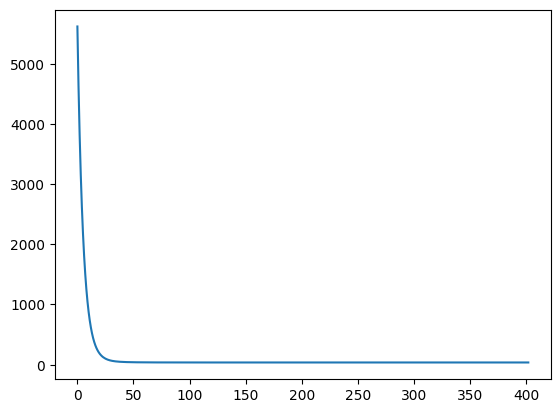

In [117]:
sk_params = {"penalty" : None, "max_iter" : 1000, "alpha" : 5e-03}
params    = {"learn_rate" : 5e-03, "max_iter" : 1000, "batch_size" : 5, "patience" : 5}
test(LinearRegressionSGD, "Regression", "Weight", params = params, sk_params = sk_params) if ALL_MODELS | LINEAR_REGRESSION_SGD else None

##### <font color='cyan'> <u>**Observations**</u> </font>

The Stochastic Gradient Descent (SGD) model exhibits a peculiar sensitivity to hyperparameter tuning. A learning rate of 0.0005 and a batch size of 50 yield the best performance in terms of mean squared error, with a patience value of 25. However, lower learning rates significantly increase training times without substantial accuracy improvements. Small adjustments to hyperparameters seem to yield similar results, suggesting stability within certain ranges. Conversely, larger changes, particularly in the learning rate, can drastically impact time performance while accuracy remains relatively stable. This sensitivity highlights the importance of careful hyperparameter tuning to strike a balance between model performance and computational efficiency for the SGD model.

### <font color='red'> <u>**Logistic Regression**</u> (Classification) </font>

testing:   	n_iter = 100   	alpha = 5   	batch_size = 50   	patience = 5  	...  	 score: 0.995283	 elapsed: 0.2726
testing:   	n_iter = 100   	alpha = 5   	batch_size = 50   	patience = 10  	...  	 score: 0.995283	 elapsed: 0.4005
testing:   	n_iter = 100   	alpha = 5   	batch_size = 50   	patience = 15  	...  	 score: 0.995283	 elapsed: 0.4506
testing:   	n_iter = 100   	alpha = 5   	batch_size = 200   	patience = 5  	...  	 score: 0.995283	 elapsed: 0.2591
testing:   	n_iter = 100   	alpha = 5   	batch_size = 200   	patience = 10  	...  	 score: 0.995283	 elapsed: 0.3033
testing:   	n_iter = 100   	alpha = 5   	batch_size = 200   	patience = 15  	...  	 score: 0.995283	 elapsed: 0.3046
testing:   	n_iter = 100   	alpha = 5   	batch_size = 500   	patience = 5  	...  	 score: 1.000000	 elapsed: 0.4112
testing:   	n_iter = 100   	alpha = 5   	batch_size = 500   	patience = 10  	...  	 score: 1.000000	 elapsed: 0.6862
testing:   	n_iter = 100   	alpha = 5   	batch_size = 500   	patience 

,True values,My model predictions,Scikit-learn predictions
0,0,0,0
1,0,0,0
2,1,1,1
3,1,1,1
4,1,1,1



My model      : 	acc : 1.00000000 	Time elapsed :  	0.32085991 s
Scikit-learn  : 	acc : 1.00000000 	Time elapsed :  	0.01936555 s


1.0

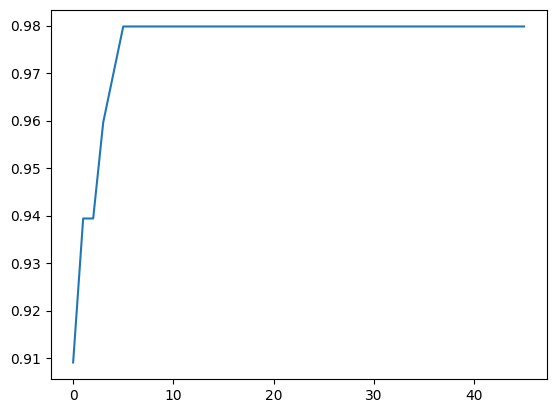

In [223]:
sk_params = {"max_iter"  : 200, "penalty" : None}
params = {"alpha" : 4, "batch_size" : 200, "n_iter" : 500, "patience" : 10}
test(LogisticRegression, "Classification", "NObeyesdad", params = params, sk_params=sk_params) if ALL_MODELS | LOGISTIC_REGRESSION else None

#### <font color='cyan'> <u>**Observations**</u> </font>

The results from the grid search over the logistic regression algorithm provide several insights into the impact of different hyperparameters on model performance:

A learning rate `alpha = 5` Consistently achieved perfect scores (`1.000000`) across all batch sizes and patience values, indicating that a higher learning rate leads to better convergence in this context.

The performance was relatively stable across different batch sizes (`50, 200, 500`) for each learning rate. However, there is a slight trend where smaller batch sizes (`50`) tend to result in slightly faster training times (`elapsed` time) compared to larger batch sizes.

Variations in patience (`5, 10, 15`) did not significantly impact the final score. This suggests that once the optimal learning rate and batch size are selected, the model converges reliably, and early stopping is triggered appropriately without significant differences in performance. However, the best results were achieved with a patience of 5, indicating that the model does not require extensive patience for early stopping to reach optimal performance.

The model showed a significant improvement in accuracy from the initial epoch (0.9293) to the early stopping point at epoch 25, achieving an accuracy of 0.9899. This indicates that early stopping is effective in preventing overfitting while still allowing the model to reach high accuracy.

### <font color='red'> <u>**K-Nearest neighbor**</u> (Classification) </font>

In [215]:

sk_params = {"n_neighbors" : 3, "metric" : "manhattan"}
params = {"k" : 3, "penalty" : "manhattan"}
test(KNearestNeighbor, "Classification", "NObeyesdad", params = params, sk_params = sk_params) if ALL_MODELS | K_NEAREST_NEIGHBOR else None

testing:   	k = 1  	penalty = euclidean 	...  	 score: 0.966981	 elapsed: 0.1030
testing:   	k = 1  	penalty = manhattan 	...  	 score: 0.990566	 elapsed: 0.1036
testing:   	k = 1  	penalty = chebyshev 	...  	 score: 0.943396	 elapsed: 0.0941
testing:   	k = 1  	penalty = minkowski 	...  	 score: 0.962264	 elapsed: 0.3224
testing:   	k = 2  	penalty = euclidean 	...  	 score: 0.962264	 elapsed: 0.1042
testing:   	k = 2  	penalty = manhattan 	...  	 score: 0.981132	 elapsed: 0.1128
testing:   	k = 2  	penalty = chebyshev 	...  	 score: 0.943396	 elapsed: 0.0894
testing:   	k = 2  	penalty = minkowski 	...  	 score: 0.976415	 elapsed: 0.3026
testing:   	k = 3  	penalty = euclidean 	...  	 score: 0.976415	 elapsed: 0.1119
testing:   	k = 3  	penalty = manhattan 	...  	 score: 0.995283	 elapsed: 0.1073
testing:   	k = 3  	penalty = chebyshev 	...  	 score: 0.948113	 elapsed: 0.0910
testing:   	k = 3  	penalty = minkowski 	...  	 score: 0.976415	 elapsed: 0.3159
testing:   	k = 4  	penalty 

,True values,My model predictions,Scikit-learn predictions
0,0,0,0
1,0,0,0
2,1,1,1
3,1,1,1
4,1,1,1



My model      : 	acc : 0.99528302 	Time elapsed :  	0.09851718 s
Scikit-learn  : 	acc : 0.99528302 	Time elapsed :  	0.02937794 s


0.9952830188679245

#### <font color='cyan'> <u>**Observations**</u> </font>

The grid search results suggest that the choice of the distance metric `penalty` and the number of neighbors `k` can significantly impact the model's accuracy. In this particular dataset, the best combination of hyperparameters was found to be `k=3` and the `Manhattan` distance metric, which achieved an impressive accuracy score of `0.995`.

Exploring the different distance metrics, we can observe that the `Manhattan` distance consistently outperforms the others across various values of `k`. This indicates that the `Manhattan` distance is particularly well-suited for this dataset, as it effectively captures the underlying patterns and similarities between the instances. On the other hand, the `Chebyshev` distance metric generally underperforms compared to the others, suggesting that it might not be the most appropriate choice for this particular problem.

Regarding the choice of `k`, the optimal value seems to be around `3` or `4`, as these values consistently yield high accuracy scores across different distance metrics. Lower values of k, such as `k=1`, tend to perform relatively poorly, likely due to increased sensitivity to noise and outliers in the data. Conversely, higher values of `k`, such as `k=5`, do not necessarily lead to better performance, as they may over-smooth the decision boundaries and fail to capture the finer details of the data distribution.

Interestingly, the model does not exhibit significant overfitting or underfitting tendencies across the the hyperparameters tested. Even at higher values of `k`, where one might expect overfitting due to the increased influence of distant neighbors, the accuracy remains consistently high. This robustness could be attributed to the inherent simplicity of the KNN algorithm, which does not involve extensive parameter tuning or complex model architectures.

### <font color='red'> <u>**Decision Tree**</u> (Classification) </font>

In [211]:
sk_params = {"criterion" : "entropy", "max_depth" : 4}
params    = {"max_depth" : 5}

test(DecisionTree, "Classification", "NObeyesdad", params = params, sk_params=sk_params) if ALL_MODELS | DECISION_TREE else None

testing:   	max_depth = 1 	...  	 score: 0.783019	 elapsed: 0.0067
testing:   	max_depth = 2 	...  	 score: 0.929245	 elapsed: 0.0125
testing:   	max_depth = 3 	...  	 score: 0.985849	 elapsed: 0.0240
testing:   	max_depth = 4 	...  	 score: 0.995283	 elapsed: 0.0341
testing:   	max_depth = 5 	...  	 score: 1.000000	 elapsed: 0.0374
testing:   	max_depth = 6 	...  	 score: 1.000000	 elapsed: 0.0337
testing:   	max_depth = 7 	...  	 score: 1.000000	 elapsed: 0.0448
testing:   	max_depth = 8 	...  	 score: 1.000000	 elapsed: 0.0345
testing:   	max_depth = 9 	...  	 score: 1.000000	 elapsed: 0.0335
testing:   	max_depth = 15 	...  	 score: 1.000000	 elapsed: 0.0364

Best params: 	max_depth = 9  	 score: 1.000000, 	 elapsed:0.0335



,True values,My model predictions,Scikit-learn predictions
0,0,0,0
1,0,0,0
2,1,1,1
3,1,1,1
4,1,1,1



My model      : 	acc : 1.00000000 	Time elapsed :  	0.03512263 s
Scikit-learn  : 	acc : 0.96698113 	Time elapsed :  	0.00353074 s


1.0

##### <font color='cyan'> **Tree Print** </font>

In [212]:
if ALL_MODELS | DECISION_TREE:
  model = DecisionTree(max_depth = 15)
  model.fit(*e.fit_transform(dataset_shuffled, "DecisionTree", "Classification", "NObeyesdad"))
  model.print_tree()

 Root──[Value None] Feature: 3
       ├── [Value 0] Return: 0
       ├── [Value 1] Return: 0
       ├── [Value 2] Return: 0
       ├── [Value 3] Return: 0
       ├── [Value 4] Feature: 2
       │   ├── [Value 2] Return: 1
       │   ├── [Value 3] Feature: 1
       │   │   ├── [Value 2] Return: 0
       │   │   ├── [Value 3] Return: 1
       │   │   ├── [Value 4] Return: 1
       │   │   ├── [Value 5] Return: 1
       │   │   ├── [Value 6] Return: 1
       │   │   ├── [Value 7] Return: 1
       │   │   └── [Value 8] Return: 1
       │   ├── [Value 4] Feature: 5
       │   │   ├── [Value 0] Feature: 0
       │   │   │   ├── [Value 0] Return: 0
       │   │   │   └── [Value 1] Return: 1
       │   │   └── [Value 1] Return: 1
       │   ├── [Value 5] Feature: 1
       │   │   ├── [Value 2] Feature: 10
       │   │   │   ├── [Value 0] Return: 1
       │   │   │   ├── [Value 1] Return: 1
       │   │   │   ├── [Value 3] Feature: 13
       │   │   │   │   ├── [Value 0] Feature: 6
       │   │

#### <font color='cyan'> <u>**Observations**</u> </font>

The grid search results suggest that for small values of `max_depth`, such as 1, the model gets underfitted and cannot predict properly, as evidenced by the low accuracy score of `0.783019`. As the `max_depth` value increases, the model's accuracy improves rapidly, reaching a score of `1.0` for `max_depth=5`. This indicates that a moderate depth is sufficient for the model to capture the underlying patterns in the data effectively.

Interestingly, the model doesn't seem to suffer from overfitting: also at higher values of `max_depth` the accuracy is `1.0`.

As it is possible to notice from the grid search results, the tree has never reached depths greater than `6`. This is likely because the model triggers the `if (sum_y == len(y)) or (sum_y == 0)` in the `grow_tree()` method condition, which means that all the examples that reached a particular node have the same target value. In such cases, the algorithm stops growing the tree further at that node, as there is no need to split the data any further, leading to a shallower tree depth.

It's worth noting that the optimal value of `max_depth` is `5`, which achieves the highest accuracy of `1.0` in less than `0.05 seconds`. This highlights the importance of finding the right balance between model complexity and performance, as deeper trees may not necessarily lead to better results and can increase computational costs.

### <font color='red'> <u>**Neural Networks**</u> (Classification and Regression) </font>

#### <font color='orange'> <u> **Classification** </u> </font>

testing:   	h_layers = [1]   	learn_rate = 0.1   	patience = 5   	batch_size = 150   	opt = adam  	...  	 score: 0.995283	 elapsed: 0.1682
testing:   	h_layers = [1]   	learn_rate = 0.1   	patience = 5   	batch_size = 150   	opt = RMSprop  	...  	 score: 0.976415	 elapsed: 0.0628
testing:   	h_layers = [1]   	learn_rate = 0.1   	patience = 5   	batch_size = 200   	opt = adam  	...  	 score: 1.000000	 elapsed: 0.0932
testing:   	h_layers = [1]   	learn_rate = 0.1   	patience = 5   	batch_size = 200   	opt = RMSprop  	...  	 score: 0.995283	 elapsed: 0.0893
testing:   	h_layers = [1]   	learn_rate = 0.1   	patience = 5   	batch_size = 250   	opt = adam  	...  	 score: 0.995283	 elapsed: 1.8836
testing:   	h_layers = [1]   	learn_rate = 0.1   	patience = 5   	batch_size = 250   	opt = RMSprop  	...  	 score: 0.976415	 elapsed: 0.1530
testing:   	h_layers = [1]   	learn_rate = 0.1   	patience = 10   	batch_size = 150   	opt = adam  	...  	 score: 1.000000	 elapsed: 0.4185
testing:   	h_lay

,True values,My model predictions,Scikit-learn predictions
0,0,0,0
1,0,0,0
2,1,1,1
3,1,1,1
4,1,1,1



My model      : 	acc : 1.00000000 	Time elapsed :  	0.13292909 s
Scikit-learn  : 	acc : 0.99056604 	Time elapsed :  	0.15252924 s


1.0

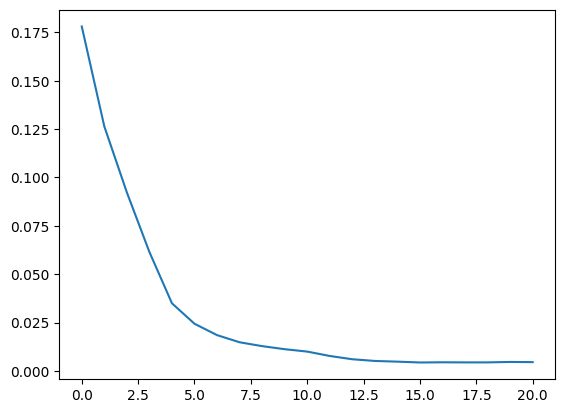

In [222]:
sk_params = {"hidden_layer_sizes" : (1), "batch_size" : 200, "learning_rate_init" : 0.1}
params    = {"h_layers"           : [1], "batch_size" : 200, "learn_rate"         : 0.1, "patience" : 5,
              "opt" : "adam", "act_fun" : "sigmoid"}

test(NeuralNetwork, "Classification", "NObeyesdad", params = params, sk_params = sk_params, ) if ALL_MODELS | NEURAL_NETWORK_C else None

#### <font color='orange'> <u> **Regression** </u> </font>

Early stopping at epoch 68, mse = 16.872266088863817


,True values,My model predictions,My model error,Scikit-learn predictions,Scikit-learn error
0,86.963765,81.178493,5.785272,81.673474,5.290291
1,61.000000,49.647124,11.352876,47.475514,13.524486
2,118.073810,115.398683,2.675127,113.791074,4.282736
3,105.423532,102.721698,2.701834,106.907958,-1.484426
4,80.000000,83.272809,-3.272809,80.930821,-0.930821



My model      : 	mse : 15.48976292 	mae : 2.99970269	Time elapsed :  	1.04027820 s
Scikit-learn  : 	mse : 19.80418921 	mae : 3.05258844	Time elapsed :  	1.30857420 s


15.489762920511483

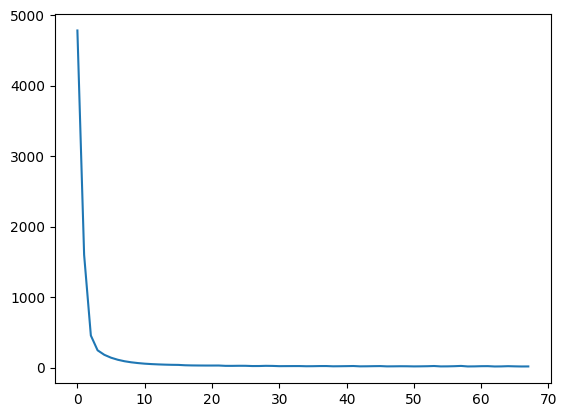

In [204]:
GRID_SEARCH = False

sk_params = {"hidden_layer_sizes" : (14), "max_iter" : 1000, "batch_size" : 220, "learning_rate_init" : 0.04}
params    = {"h_layers"           : [14], "max_iter" : 1000, "batch_size" : 220, "learn_rate"         : 0.04,
             "patience" : 5, "opt" : "RMSprop"}

test(NeuralNetwork, "Regression", "Weight", params = params, sk_params = sk_params) if ALL_MODELS | NEURAL_NETWORK_R else None

#### <font color='cyan'> <u>**Observations**</u> </font>

After some iterations of the grid search, changing the parameters to be tested, I discovered that the `adam` optimization performs better than `RMSprop` for classification problems, while `RMSprop` performs effectively for regression problems. Both optimizations perform well with a simple neural network architecture, such as one or two hidden layers with a few nodes each. This streamlined configuration is sufficient to train the model using batches of 200 samples, resulting in a very fast training process that rivals the speed of models in libraries like scikit-learn.

It is interesting to observe how smaller learning rates take more time to compute results, and the batch size seems to have a similar behavior. For classification problems, the grid search recommends using a single hidden layer with a single node. This minimalistic approach is surprisingly effective due to the relatively straightforward nature of classification tasks.

In contrast, regression problems require a more complex approach. Since the network needs to predict continuous values over a wide range, the training step is longer and demands more computation. The grid search results suggest using a model with two hidden layers, each containing eight nodes. This architecture provides the necessary capacity to handle the increased complexity and ensures more accurate predictions for regression tasks.

The default hyperparameters I gave to my models are the best ones I found as a compromise between score and time elapsed. They may be different from the ones returned from the grid search because the grid search chooses the parameters that lead to the better score, and in case of a tie, it chooses the one that took less time.

It's important to note that having more nodes doesn't necessarily mean higher precision. The grid search results demonstrate that simpler architectures can often achieve excellent performance, especially for classification tasks, while more complex architectures are required for regression problems to capture the nuances of continuous value predictions.

### <font color='red'> <u>**Model Comparison**</u> </font>

In [205]:
df = pd.DataFrame(comparing).T
df.columns = ["My model", "Time elapsed", "Scikit-learn", "Time elapsed"]
df = df.style.set_table_styles([dict(selector="th", props=[("text-align", "center")]), dict(selector="td", props=[("text-align", "center")])])
display(df)

,My model,Time elapsed,Scikit-learn,Time elapsed
LinearRegressionMP,mse = 25.976353517093408,0.004576,mse = 25.976353517093237,0.017062
LinearRegressionSGD,mse = 25.995715199024435,0.799582,mse = 25.87602950193621,0.012288
LogisticRegression,acc = 1.0,0.443786,acc = 1.0,0.042313
KNearestNeighbor,acc = 0.9952830188679245,0.097565,acc = 0.9952830188679245,0.030189
DecisionTree,acc = 1.0,0.023884,acc = 0.9669811320754716,0.002701
NeuralNetworkClassification,acc = 1.0,0.155998,acc = 0.9858490566037735,0.194845
NeuralNetworkRegression,mse = 15.489762920511483,1.040278,mse = 19.80418921017188,1.308574


The analysis of the models' performance reveals significant insights into the trade-offs between speed and accuracy, shaped by the structural differences of each model. Linear Regression with Moore-Penrose pseudoinverse (MP) and Stochastic Gradient Descent (SGD) demonstrate a notable example of this trade-off. Although both methods yield similar Mean Squared Error (MSE) values, their time efficiency differs drastically. MP completes its task in a mere `0.005 seconds`, whereas SGD requires almost a second. This stark contrast underscores the efficiency of simpler linear models, especially for rapid predictions where minimal accuracy improvement does not justify a higher time cost.

Logistic Regression stands out with its perfect accuracy in binary classification tasks, achieved in less then half second. This balance of high accuracy and moderate computational time makes it an ideal choice for straightforward classification problems. Its performance highlights the efficacy of linear models in situations where interpretability and quick computation are crucial.

In comparison, K-Nearest Neighbor (KNN) provides a compelling case for balancing accuracy and computational efficiency. Achieving `99.53%` accuracy with a time cost of about `0.1 seconds`, KNN offers robust performance while remaining computationally manageable. This model's simplicity and ease of implementation are beneficial for tasks requiring a quick and reasonably accurate solution.

Decision Trees and Neural Networks illustrate the impact of model complexity on performance. Decision Trees, achieving perfect accuracy in just about `0.025 seconds`, demonstrate the power of non-linear models in handling both numerical and categorical data. Their interpretability and high performance make them valuable, although their training time can be relatively longer than simpler models.

Neural Networks, while excelling in both classification and regression tasks, require the most computational resources. The classification accuracy is perfect (`1.0`) with a time cost of about `0.1 seconds`, and the regression task yields the lowest MSE of `15.490` but takes around `1 second`. These results reflect the neural networks' capability to capture complex patterns in data, justifying their use when high prediction quality is essential and computational resources are abundant.

Overall, this comparative analysis underscores a fundamental trade-off in machine learning: simpler models like Linear Regression (MP) and KNN offer faster predictions with acceptable accuracy, making them suitable for real-time applications or when computational resources are limited. In contrast, more complex models like Decision Trees and Neural Networks deliver superior accuracy and lower MSE, although with higher computational costs.